In [1]:
import math
import cv2 as cv
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [75]:
class CleanImage():
    """
    Cleans image from objects by removing and filling gaps from parts of the same image
    Desined to clean images of water surface - 
    hence filling object with different parts of the image should provide good representation of the water surface 
    """
    def __init__(self, img_path, experiment = True,save = False,out_path = None):
        """
        Activates main function
        ARGS:
            img_path (str) - path of image to clean
            experiment (boolean, default True) - if true, provides result plot and not saving
            -TO SAVE ALL RESULTS TURN EXPERIMENT TO FALSE-
            -TO SAVE IN THIS MODE: activate instance.save_result() after initiation-
            save (boolean, default False) - if True, saves result. False if experiment is True
            out_path (str, optional) - output dir name. if not provided, creates dir named 'samples' at the home dir and to save
        RETURNS (instance variable only) - 
            To plot steps of result activae: instance.plot_steps() after initiation
            To get final result as variable: instance.img_filled after initiation
        """
        self.img_path = img_path
        self.experiment = experiment
        self.save = False if experiment else save
        self.out_path = os.path.join(os.getcwd(),'results') if out_path is None else out_path
        self.main()

    def remove_dirt(self):
        """
        finds contours in different bands, and uses mirror projection of it as fill pattern
        this is the main clean stage
        returns cleaned image and original image

        RETURNS (instance variable only) - 
        self.img = original image
        self.img_test = cleaned image
 
        """
          # Load the image
        img = cv.imread(self.img_path)
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        img_test = img.copy()

#         for channle in [0,1,2]:

#             im = img_test[:,:,channle]

#             # Convert image to binary
#             _, bw = cv.threshold(im, 50, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)

#             contours, _ = cv.findContours(bw, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)

#             for i, c in enumerate(contours):

#               # Calculate the area of each contour
#                 area = cv.contourArea(c)

#                 # Ignore contours that are too small or too large
#                 if area > 5 and 100000 > area:

#                     rect = cv.minAreaRect(c)
#                     box = cv.boxPoints(rect)
#                     box = np.int0(box)

#                     #fill original image area with white_background
#                     cv2.fillPoly(img_test, [box],  (255, 255, 255),0)
#                     #flip image
#                     flipped_img = np.fliplr(img_test)
#                     flipped_img = np.flipud(flipped_img)
#                     #create white image with mask area 
#                     mask = np.zeros(flipped_img.shape[0:2], dtype=np.uint8)
#                     cv2.drawContours(mask, [box], -1, (255, 255, 255), -1)
#                     #fill mask area with data from flipped image
#                     res = cv2.bitwise_and(flipped_img,flipped_img,mask = mask)
#                     #combine images
#                     img_test = img_test+res


        im = img_test[:,:,2]

        # Convert image to binary
        _, bw = cv.threshold(im, 50, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)

        contours, _ = cv.findContours(bw, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)

        for i, c in enumerate(contours):

          # Calculate the area of each contour
            area = cv.contourArea(c)

            # Ignore contours that are too small or too large
            if area > 5 and 100000 > area:

                rect = cv.minAreaRect(c)
                box = cv.boxPoints(rect)
                box = np.int0(box)

                #fill original image area with white_background
                cv2.fillPoly(img_test, [box],  (255, 255, 255),0)
                #flip image
                flipped_img = np.fliplr(img_test)
                flipped_img = np.flipud(flipped_img)
                #create white image with mask area 
                mask = np.zeros(flipped_img.shape[0:2], dtype=np.uint8)
                cv2.drawContours(mask, [box], -1, (255, 255, 255), -1)
                #fill mask area with data from flipped image
                res = cv2.bitwise_and(flipped_img,flipped_img,mask = mask)
                #combine images
                img_test = img_test+res                    
        self.img = img
        self.img_test = img_test
    def remove_dirt2(img_path):
        """
        finds contours in different bands, and uses mirror projection of it as fill pattern
        this is the main clean stage
        returns cleaned image and original image

        RETURNS (instance variable only) - 
        self.img = original image
        self.img_test = cleaned image

        """
          # Load the image
        img = cv.imread(img_path)
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        img_test = img.copy()
        img_countour = img.copy()

        def pro(image,fun = 1):
            image = image.copy()
            im = image[:,:,1]

            # Convert image to binary
            _, bw = cv.threshold(im, 50, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)

            if fun==1:
                # Create an image of all white pixels
                white_image = 255 * np.ones_like(bw)

                # Create the opposite mask
                opposite_mask = white_image - bw
            else:
                opposite_mask = bw

            contours, _ = cv.findContours(opposite_mask, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)

            #fill original image area with white_background
            cv2.fillPoly(image, contours,  (255, 255, 255),0)
            #flip image
            flipped_img = np.fliplr(image) if fun==1 else np.flipud(image)

            #create white image with mask area 
            mask = np.zeros(flipped_img.shape[0:2], dtype=np.uint8)
            cv2.drawContours(mask, contours, -1, (255, 255, 255), -1)
            #fill mask area with data from flipped image
            res = cv2.bitwise_and(flipped_img,flipped_img,mask = mask)

            #combine images
            image_out = image+res  

            plt.figure(figsize=(15, 10))
            ax1 = plt.subplot(2,2,1)
            ax1.imshow(mask)
            ax1.set_title('mask')

            ax2 = plt.subplot(2,2,2)
            ax2.imshow(flipped_img)
            ax2.set_title('flipped_img')

            ax3 = plt.subplot(2,2,3)
            ax3.imshow(res)
            ax3.set_title('res')
            ax4 = plt.subplot(2,2,4)
            ax4.imshow(image_out)
            ax4.set_title('image')
            return image_out

        img_test1 = pro(img_test)
        img_test2 = pro(img_test1,2)


        return img,img_test2,contours

    def find_biggest(self,contours):
        """
        find the biggest contour in the image
        RETURNS - 
            contour parameters: center,box,width,height,angle 
        """
        init_area = 0
        new_contour = ''
        # walk through contours
        for contour in contours:
          # Calculate the area of each contour
            area = cv.contourArea(contour)
            # Ignore contours that are too small or too large
            if area > 50 and area>init_area:
                init_area=area
                new_contour = contour
                
        center,width,height,angle,box = self.contour_parameters(new_contour)
        if angle>=90:
            width,height=height,width
        print(f'Biggest rec:\ncenter:{center},width:{width},height:{height},angle:{angle}')
        return center,box,width,height,angle
    
    def contour_parameters(self,contour):
        """
        returns the main parameters of contour
        Activated in find_biggest and main code
        ARGS - 
            contour: CV2 contour entity
        RETURNS - 
            center,width,height,angle of contour
        """
         # cv.minAreaRect returns:
        #         (center(x, y), (width, height), angle of rotation) = cv2.minAreaRect(c)
        rect = cv.minAreaRect(contour)
        box = cv.boxPoints(rect)
        box = np.int0(box)
        # Retrieve the key parameters of the rotated bounding box
        center = (int(rect[0][0]),int(rect[0][1])) 
        width = int(rect[1][0])
        height = int(rect[1][1])
        angle = int(rect[2])
        return center,width,height,angle,box
    
    
    def calculate_white(self):    
        """
        returns the coordinates of white middle area,
        than calculates intersected area according to position of white box
        
        ARGS - 
            None
        RETURNS (instance variable only) - 
            self.white_bbox = position of white box
            self.filled_box = position of fill box
        """
        self.correct_middle = False
        green = self.img_test[:,:,0]
        # Convert image to binary
        _, bw = cv.threshold(green, 230, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)

        # Find all the contours in the thresholded image
        contours, _ = cv.findContours(bw, cv.RETR_LIST, cv.CHAIN_APPROX_NONE)

        center,white_bbox,width,height,angle = self.find_biggest(contours)
        #in case the middle contour for fix is too big, stop process and later just clean middle
        if max(width,height)>500:
            self.correct_middle = True
#             white_bbox,width,height,angle=[[  489,489],[999   0],[999 999], [  0 999]],
#             [[485 483]
#  [504 478]
#  [513 515]
#  [494 520]]
        x = np.array([coor[0] for coor in white_bbox])
        x1,x2,x3,x4 = x
        y = np.array([coor[1] for coor in white_bbox])
        y1,y2,y3,y4 = y

    #     angle =   angle if width < height else 90+angle
        angle =   0 if angle==90 else angle

        if width>height:
            down_scale = y.max()-y.min() if angle==0 else y[0]-y[1]
            x_move = int(down_scale*(math.tan(math.radians(angle)))) #if angle is 0, x will move 0
            print(f'down_scale:{down_scale},x_move:{x_move},angle:{angle}')
            #two options, left side is higher than right or opposite
            if y1>y4:
                #right side higher
                print('right')
    #             x_move = -x_move
            elif y4>y1:
                print('left',x_move)
                #left side higher - need to move box left
                x_move = -x_move

            print('entered')
            filled_box = np.array([[coor[0]+x_move,coor[1]+down_scale] for coor in white_bbox])
        elif width<height:
            print('entered width<height',x)
            side_scale = x.max()-x.min() if angle==0 else x[3]-x[0]

            y_move = int(side_scale*(math.tan(math.radians(angle)))) #if angle is 0, x will move 0
            print(f'side_scale:{side_scale},y_move:{y_move}')
            filled_box = np.array([[coor[0]-side_scale,coor[1]-y_move] for coor in white_bbox])
        else:
            #square
            down_scale = y.max()-y.min()
            filled_box = np.array([[coor[0],coor[1]+down_scale] for coor in white_bbox])
            
        
        self.white_bbox = white_bbox
        self.filled_box = filled_box
        
    def middle_correction(self,rec_len = 100):    

        middle_correction_img = self.img_test.copy()
        mid = int(middle_correction_img.shape[0]/2)
        print(mid)
        box_mid = np.array([[mid-rec_len,mid-rec_len],[mid+rec_len,mid-rec_len],[mid+rec_len,mid+rec_len],[mid-rec_len,mid+rec_len]])
        cv2.drawContours(middle_correction_img,[box_mid], -1, (255, 255, 255), -1)

        mid2=100
        box2 = np.array([[mid2-rec_len,mid2-rec_len],[mid2+rec_len,mid2-rec_len],[mid2+rec_len,mid2+rec_len],[mid2-rec_len,mid2+rec_len]])
        mask = np.zeros(middle_correction_img.shape[0:2], dtype=np.uint8)
        cv2.drawContours(mask,[box2], -1, (255, 255, 255), -1)
        rect = cv2.boundingRect(box2) # returns (x,y,w,h) of the rect
        cropped = middle_correction_img[rect[1]: rect[1] + rect[3], rect[0]: rect[0] + rect[2]]
        rect = cv2.boundingRect(box_mid)
        middle_correction_img[rect[1]: rect[1] + rect[3], rect[0]: rect[0] + rect[2]] = cropped
#         self.clean_img_middle = middle_correction_img
        self.res1 = middle_correction_img
        self.img_filled = middle_correction_img
        
    def fill_pattern(self):
        """
        uses coordinates from 'calculate_white' function and replaces white area with filled intersected area
        in case of image with no appropriate box to fix, no action is taken
        ARGS - 
            None
        RETURNS (instance variable only)  - 
            self.mask1 - mask of area that will fill the blank part
            self.res - image of fill area
            self.mask2 - white and fill area masked together
            self.res1 = white and fill area together as image
            self.img_filled = complete image result
            
        """
        def coordinate(box):
            x_min = box.transpose()[0].min()
            x_max = box.transpose()[0].max()
            y_min = box.transpose()[1].min()
            y_max = box.transpose()[1].max()
            return x_min,x_max,y_min,y_max
        if self.correct_middle:
            self.middle_correction()
        else:
            #get coordinates of boxes
            x_min_w,x_max_w,y_min_w,y_max_w = coordinate(self.white_bbox)
            x_min_f,x_max_f,y_min_f,y_max_f = coordinate(self.filled_box)

            #draw contour of filled contour (to be copied)
            mask = np.zeros(self.img_test.shape[0:2], dtype=np.uint8)
            cv2.drawContours(mask, [self.filled_box], -1, (255, 255, 255), -1)
            self.mask1 = mask
            #fill mask area with data from original image
            res = cv2.bitwise_and(self.img_test,self.img_test,mask = mask)#now have pattern area copied
            self.res = res
            try:
                #first part is the white blank area coordinates
                #second is the filled area
                #we copy the pattern to this area
                res[y_min_w:y_max_w,x_min_w:x_max_w,:] = res[y_min_f:y_max_f,x_min_f:x_max_f,:]
                #we now create mask for the double filled area - we want to only keep the relavant part (was blank area)
                mask = np.zeros(self.img_test.shape[0:2], dtype=np.uint8)
                cv2.drawContours(mask,[self.white_bbox], -1, (255, 255, 255), -1)
                self.mask2 = mask
                #fill mask area with data from flipped image
                res1 = cv2.bitwise_and(res,res,mask = mask)
                self.res1 = res1
                self.img_filled = self.img_test+res1
            except ValueError:
                # in case of "could not broadcast input array from shape (n,m,u) into shape (n,m,u)" error,
                # which means no white area to clean
                print('value error')
                self.res1 = self.img_test
                self.img_filled = self.img_test

    
    def main(self):
        self.remove_dirt()
        self.calculate_white()
        self.fill_pattern()
        plt.imshow(self.img_filled) if self.experiment else None
        self.save_result() if self.save else None
    def plot_steps(self):
        """
        plots results for testing or evaluating the image results
        executes plot of:
            original image
            first clean step
            mask of fill area
            final result
            
        """
        plt.figure(figsize=(15, 10))
        ax1 = plt.subplot(2,2,1)
        ax1.imshow(self.img)
        ax1.set_title('full image')

        ax2 = plt.subplot(2,2,2)
        ax2.imshow(self.img_test)
        ax2.set_title('clean1')
        
        ax3 = plt.subplot(2,2,3)
        ax3.imshow(self.res1)
        ax3.set_title('left mask')

        ax4 = plt.subplot(2,2,4)
        ax4.imshow(self.img_filled)
        ax4.set_title('end result')

        plt.tight_layout()
        
    def save_result(self,out_path=None):
        self.out_path = self.out_path if out_path is None else out_path
      
        if not os.path.exists(self.out_path):
            os.makedirs(self.out_path)
            
        img_name,suffix = self.img_path.split('\\')[-1].split('.')
        
        img_out_path = os.path.join(self.out_path,str(img_name)+'.'+suffix)
        cv.imwrite(img_out_path,self.img_filled)
        print(f'image saved at:\n{img_out_path}')
        


In [206]:
class CleanImage():
    """
    Cleans image from objects by removing and filling gaps from parts of the same image
    Desined to clean images of water surface - 
    hence filling object with different parts of the image should provide good representation of the water surface 
    """
    def __init__(self, img_path,cat, experiment = True,save = False,out_path = None):
        """
        Activates main function
        ARGS:
            img_path (str) - path of image to clean
            experiment (boolean, default True) - if true, provides result plot and not saving
            -TO SAVE ALL RESULTS TURN EXPERIMENT TO FALSE-
            -TO SAVE IN THIS MODE: activate instance.save_result() after initiation-
            save (boolean, default False) - if True, saves result. False if experiment is True
            out_path (str, optional) - output dir name. if not provided, creates dir named 'samples' at the home dir and to save
        RETURNS (instance variable only) - 
            To plot steps of result activae: instance.plot_steps() after initiation
            To get final result as variable: instance.img_filled after initiation
        """
        self.img_path = img_path
        self.experiment = experiment
        self.save = False if experiment else save
        self.out_path = os.path.join(os.getcwd(),'results') if out_path is None else out_path
        self.cat = cat
        self.main()

    def remove_dirt(self):
        """
        finds contours in different bands, and uses mirror projection of it as fill pattern
        this is the main clean stage
        returns cleaned image and original image

        RETURNS (instance variable only) - 
        self.img = original image
        self.img_test = cleaned image
 
        """
          # Load the image
        img = cv.imread(self.img_path)
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        img_test = img.copy()
        self.img_test = img_test.copy()
        self.img = img.copy()
        
        def pro(image,switch = True):
            
            im = image[:,:,1]

            # Convert image to binary
            _, bw = cv.threshold(im, 50, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)

            if switch:
                # Create an image of all white pixels
                white_image = 255 * np.ones_like(bw)

                # Create the opposite mask
                opposite_mask = white_image - bw
            else:
                opposite_mask = bw

            contours, _ = cv.findContours(opposite_mask, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)

            #fill original image area with white_background
            cv2.fillPoly(image, contours,  (255, 255, 255),0)
            #flip image
            flipped_img = np.fliplr(image) if switch else np.flipud(image)

            #create white image with mask area 
            mask = np.zeros(flipped_img.shape[0:2], dtype=np.uint8)
            cv2.drawContours(mask, contours, -1, (255, 255, 255), -1)
            #fill mask area with data from flipped image
            res = cv2.bitwise_and(flipped_img,flipped_img,mask = mask)

            #combine images
            image = image+res  
            return image
        
        def calculate_white_percentage(image):
            # Convert the image to grayscale
            gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

            # Threshold the grayscale image to get a binary image
            _, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

            # Calculate the total number of pixels in the image
            total_pixels = image.shape[0] * image.shape[1]

            # Count the number of white pixels in the binary image
            white_pixels = np.sum(binary_image == 255)

            # Calculate the percentage of white pixels
            white_percentage = (white_pixels / total_pixels) * 100

            return white_percentage
        if self.cat>5:
            image = self.img_test.copy()
            img_trans = pro(image)
            image = self.img_test.copy()
            image_out = img_trans.copy() if calculate_white_percentage(img_trans)<80 else pro(image,0)

#             per = calculate_white_percentage(image_out)
#             print(per)
            image = image_out.copy()
            img_trans = pro(image)
            image = image_out.copy()
            image_out = img_trans.copy() if calculate_white_percentage(img_trans)<80 else pro(image,0)
            self.img_test = image_out.copy()
#             per = calculate_white_percentage(image_out)
#             print(per)
#             self.img_test = img_temp
#             img_temp = pro(2)
#             per = calculate_white_percentage(img_temp)
#             print(per)
#             self.img_test = img_temp if per <50 else pro(1)

        else:   
            im = img_test[:,:,2] #if self.cat==5 else img_test[:,:,2]


            # Convert image to binary
            _, bw = cv.threshold(im, 50, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)

            contours, _ = cv.findContours(bw, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)

            for i, c in enumerate(contours):

              # Calculate the area of each contour
                area = cv.contourArea(c)

                # Ignore contours that are too small or too large
                if area > 5 and 100000 > area:

                    rect = cv.minAreaRect(c)
                    box = cv.boxPoints(rect)
                    box = np.int0(box)

                    #fill original image area with white_background
                    cv2.fillPoly(img_test, [box],  (255, 255, 255),0)
                    #flip image
                    flipped_img = np.fliplr(img_test)
                    flipped_img = np.flipud(flipped_img)
                    #create white image with mask area 
                    mask = np.zeros(flipped_img.shape[0:2], dtype=np.uint8)
                    cv2.drawContours(mask, [box], -1, (255, 255, 255), -1)
                    #fill mask area with data from flipped image
                    res = cv2.bitwise_and(flipped_img,flipped_img,mask = mask)
                    #combine images
                    img_test = img_test+res                    

            self.img_test = img_test


    def find_biggest(self,contours):
        """
        find the biggest contour in the image
        RETURNS - 
            contour parameters: center,box,width,height,angle 
        """
        init_area = 0
        new_contour = ''
        # walk through contours
        for contour in contours:
          # Calculate the area of each contour
            area = cv.contourArea(contour)
            # Ignore contours that are too small or too large
            if area > 10 and area>init_area:
                init_area=area
                new_contour = contour
#         if new_contour is not None:   
        try:
            center,width,height,angle,box = self.contour_parameters(new_contour)
            if angle>=90:
                width,height=height,width
            print(f'Biggest rec:\ncenter:{center},width:{width},height:{height},angle:{angle}')
            return center,box,width,height,angle
        except:
            return 0,0,0,0,0
#         else:
#             print(f'no white contour')
#             return new_contour
                  
    
    def contour_parameters(self,contour):
        """
        returns the main parameters of contour
        Activated in find_biggest and main code
        ARGS - 
            contour: CV2 contour entity
        RETURNS - 
            center,width,height,angle of contour
        """
         # cv.minAreaRect returns:
        #         (center(x, y), (width, height), angle of rotation) = cv2.minAreaRect(c)
        rect = cv.minAreaRect(contour)
        box = cv.boxPoints(rect)
        box = np.int0(box)
        # Retrieve the key parameters of the rotated bounding box
        center = (int(rect[0][0]),int(rect[0][1])) 
        width = int(rect[1][0])
        height = int(rect[1][1])
        angle = int(rect[2])
        return center,width,height,angle,box
    
    
    def calculate_white(self):    
        """
        returns the coordinates of white middle area,
        than calculates intersected area according to position of white box
        
        ARGS - 
            None
        RETURNS (instance variable only) - 
            self.white_bbox = position of white box
            self.filled_box = position of fill box
        """
        self.correct_middle = False
#         green = self.img_test[:,:,0]
#         # Convert image to binary
#         _, bw = cv.threshold(green, 245, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)

        # Find all the contours in the thresholded image
#         contours, _ = cv.findContours(bw, cv.RETR_LIST, cv.CHAIN_APPROX_NONE)
        # Apply thresholding
        gray_image = cv2.cvtColor(self.img_test, cv2.COLOR_BGR2GRAY)
        _, binary_image = cv2.threshold(gray_image, 200, 255, cv2.THRESH_BINARY)

        # Find contours
        contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        center,white_bbox,width,height,angle = self.find_biggest(contours)
        if center!=0:
            #in case the middle contour for fix is too big, stop process and later just clean middle
            print(max(width,height))
            if max(width,height)>500 or max(width,height)<15 :
#                 self.correct_middle = True
#             else:
                middle_correction_img = self.img_test.copy()
                mid = int(middle_correction_img.shape[0]/2)
                rec_len=50
                white_bbox = np.array([[mid-rec_len,mid-rec_len],[mid+rec_len,mid-rec_len],[mid+rec_len,mid+rec_len],[mid-rec_len,mid+rec_len]])
                width,height,angle = 50,50,90
                cv2.drawContours(self.img_test,[white_bbox], -1, (255, 255, 255), -1)
#                 center = 
    #             [[485 483]
    #  [504 478]
    #  [513 515]
    #  [494 520]]
            x = np.array([coor[0] for coor in white_bbox])
            x1,x2,x3,x4 = x
            y = np.array([coor[1] for coor in white_bbox])
            y1,y2,y3,y4 = y

        
        #     angle =   angle if width < height else 90+angle
            angle =   0 if angle==90 else angle

            if width>height:
                down_scale = y.max()-y.min() if angle==0 else y[0]-y[1]
                x_move = int(down_scale*(math.tan(math.radians(angle)))) #if angle is 0, x will move 0
                print(f'down_scale:{down_scale},x_move:{x_move},angle:{angle}')
                #two options, left side is higher than right or opposite
                if y1>y4:
                    #right side higher
                    print('right')
        #             x_move = -x_move
                elif y4>y1:
                    print('left',x_move)
                    #left side higher - need to move box left
                    x_move = -x_move

                print('entered')
                filled_box = np.array([[coor[0]+x_move,coor[1]+down_scale] for coor in white_bbox])
            elif width<height:
                print('entered width<height',x)
                side_scale = x.max()-x.min() if angle==0 else x[3]-x[0]

                y_move = int(side_scale*(math.tan(math.radians(angle)))) #if angle is 0, x will move 0
                print(f'side_scale:{side_scale},y_move:{y_move}')
                filled_box = np.array([[coor[0]-side_scale,coor[1]-y_move] for coor in white_bbox])
            else:
                #square
                down_scale = y.max()-y.min()
                filled_box = np.array([[coor[0],coor[1]+down_scale] for coor in white_bbox])


            self.white_bbox = white_bbox
            self.filled_box = filled_box
        else:
            
            self.white_bbox = 0
            self.filled_box = 0
        
    def middle_correction(self,rec_len = 50):    

        middle_correction_img = self.img_test.copy()
        mid = int(middle_correction_img.shape[0]/2)
        print(mid)
        box_mid = np.array([[mid-rec_len,mid-rec_len],[mid+rec_len,mid-rec_len],[mid+rec_len,mid+rec_len],[mid-rec_len,mid+rec_len]])
        cv2.drawContours(middle_correction_img,[box_mid], -1, (255, 255, 255), -1)

        mid2=50
        box2 = np.array([[mid2-rec_len,mid2-rec_len],[mid2+rec_len,mid2-rec_len],[mid2+rec_len,mid2+rec_len],[mid2-rec_len,mid2+rec_len]])
        mask = np.zeros(middle_correction_img.shape[0:2], dtype=np.uint8)
        cv2.drawContours(mask,[box2], -1, (255, 255, 255), -1)
        rect = cv2.boundingRect(box2) # returns (x,y,w,h) of the rect
        cropped = middle_correction_img[rect[1]: rect[1] + rect[3], rect[0]: rect[0] + rect[2]]
        rect = cv2.boundingRect(box_mid)
        try:
            middle_correction_img[rect[1]: rect[1] + rect[3], rect[0]: rect[0] + rect[2]] = cropped
        except:
            middle_correction_img = self.img_test.copy()
#         self.clean_img_middle = middle_correction_img
        self.res1 = middle_correction_img
        self.img_filled = middle_correction_img

    def middle_correction_circle(self, rec_len=100):
        middle_correction_img = self.img_test.copy()
        mid = int(middle_correction_img.shape[0] / 2)

        # Create circular contour points
        center = (mid, mid)
        radius = rec_len
        num_points = 1000  # Increase the number of points for smoother and larger circle
        circle_points = []
        for angle in np.linspace(0, 2 * np.pi, num_points):
            x = int(center[0] + radius * np.cos(angle))
            y = int(center[1] + radius * np.sin(angle))
            circle_points.append([x, y])
        circle_points = np.array(circle_points)

        # Create a blank mask and draw the circular contour
        mask = np.zeros(middle_correction_img.shape[0:2], dtype=np.uint8)
        cv2.drawContours(mask, [circle_points], -1, (255), -1)

        # Extract the circular region from the original image using the mask
        circular_region = cv2.bitwise_and(middle_correction_img, middle_correction_img, mask=mask)

        # Compute the bounding rectangle of the circular contour
        rect = cv2.boundingRect(circle_points)

        # Resize the circular region to match the dimensions of the bounding rectangle
        resized_circular_region = cv2.resize(circular_region, (rect[2], rect[3]))

        # Calculate the coordinates for placing the resized circular region within the bounding rectangle
        x_offset = rect[0]
        y_offset = rect[1]

        # Replace the corresponding region in the original image with the resized circular region
        middle_correction_img[y_offset: y_offset + rect[3], x_offset: x_offset + rect[2]] = resized_circular_region

        self.res1 = middle_correction_img
        self.img_filled = middle_correction_img






        
    def fill_pattern(self):
        """
        uses coordinates from 'calculate_white' function and replaces white area with filled intersected area
        in case of image with no appropriate box to fix, no action is taken
        ARGS - 
            None
        RETURNS (instance variable only)  - 
            self.mask1 - mask of area that will fill the blank part
            self.res - image of fill area
            self.mask2 - white and fill area masked together
            self.res1 = white and fill area together as image
            self.img_filled = complete image result
            
        """
        def coordinate(box):
            x_min = box.transpose()[0].min()
            x_max = box.transpose()[0].max()
            y_min = box.transpose()[1].min()
            y_max = box.transpose()[1].max()
            return x_min,x_max,y_min,y_max
        if self.correct_middle:
            self.middle_correction()
        else:
            #get coordinates of boxes
            x_min_w,x_max_w,y_min_w,y_max_w = coordinate(self.white_bbox)
            x_min_f,x_max_f,y_min_f,y_max_f = coordinate(self.filled_box)

            #draw contour of filled contour (to be copied)
            mask = np.zeros(self.img_test.shape[0:2], dtype=np.uint8)
            cv2.drawContours(mask, [self.filled_box], -1, (255, 255, 255), -1)
            self.mask1 = mask
            #fill mask area with data from original image
            res = cv2.bitwise_and(self.img_test,self.img_test,mask = mask)#now have pattern area copied
            self.res = res
            try:
                #first part is the white blank area coordinates
                #second is the filled area
                #we copy the pattern to this area
                res[y_min_w:y_max_w,x_min_w:x_max_w,:] = res[y_min_f:y_max_f,x_min_f:x_max_f,:]
                #we now create mask for the double filled area - we want to only keep the relavant part (was blank area)
                mask = np.zeros(self.img_test.shape[0:2], dtype=np.uint8)
                cv2.drawContours(mask,[self.white_bbox], -1, (255, 255, 255), -1)
                self.mask2 = mask
                #fill mask area with data from flipped image
                res1 = cv2.bitwise_and(res,res,mask = mask)
                self.res1 = res1
                self.img_filled = self.img_test+res1
            except ValueError:
                # in case of "could not broadcast input array from shape (n,m,u) into shape (n,m,u)" error,
                # which means no white area to clean
                print('value error')
                self.res1 = self.img_test
                self.img_filled = self.img_test

    
    def main(self):
        self.remove_dirt()
        self.calculate_white()
#         if contour_new is not None:
        self.fill_pattern() if self.cat <= 5 and np.any(self.white_bbox!=0) else self.middle_correction(rec_len=50)
        plt.imshow(self.img_test) if self.experiment else None
        self.save_result() if self.save else None
    def plot_steps(self):
        """
        plots results for testing or evaluating the image results
        executes plot of:
            original image
            first clean step
            mask of fill area
            final result
            
        """
        plt.figure(figsize=(15, 10))
        ax1 = plt.subplot(2,2,1)
        ax1.imshow(self.img)
        ax1.set_title('full image')

        ax2 = plt.subplot(2,2,2)
        ax2.imshow(self.img_test)
        ax2.set_title('clean1')
        
        ax3 = plt.subplot(2,2,3)
        ax3.imshow(self.res1)
        ax3.set_title('left mask')

        ax4 = plt.subplot(2,2,4)
        ax4.imshow(self.img_filled)
        ax4.set_title('end result')

        plt.tight_layout()
        
    def save_result(self,out_path=None):
        self.out_path = self.out_path if out_path is None else out_path
      
        if not os.path.exists(self.out_path):
            os.makedirs(self.out_path)
            
        img_name,suffix = self.img_path.split('\\')[-1].split('.')
        
        img_out_path = os.path.join(self.out_path,str(img_name)+'.'+suffix)
        im_out = rgb_image = cv2.cvtColor(self.img_filled, cv2.COLOR_BGR2RGB)
        cv.imwrite(img_out_path,im_out)
        print(f'image saved at:\n{img_out_path}')
        


Biggest rec:
center:(499, 499),width:29,height:29,angle:45
29
500


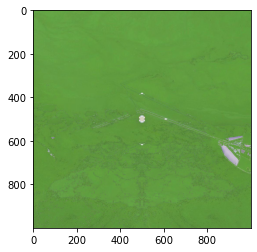

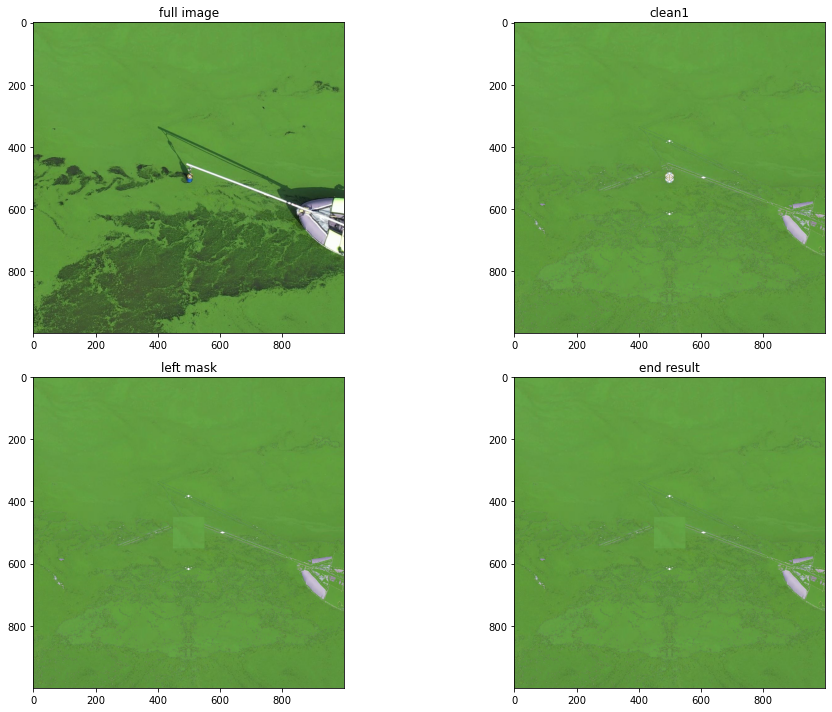

In [209]:
path1 = r'C:\Users\urial\BG\AlphaBravo\samples\out_inf\5\inference_33.jpg'
i = CleanImage(path1,6)
i.plot_steps()


In [210]:
i.save_result(r'C:\Users\urial\BG\AlphaBravo\work')

image saved at:
C:\Users\urial\BG\AlphaBravo\work\inference_33.jpg


In [208]:
800/5316

0.1504890895410083

512


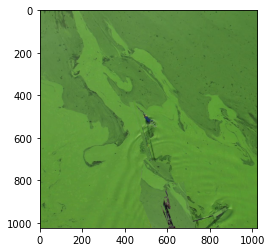

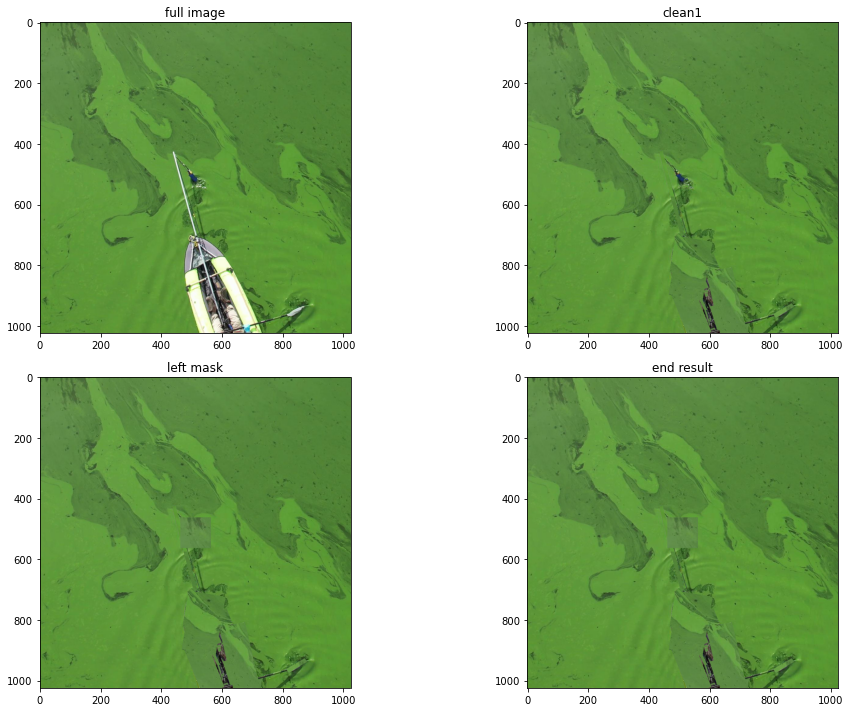

In [159]:
path= r'C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\train_val_change\4384_1638784104.jpg'
i = CleanImage(path,5)
i.plot_steps()


In [160]:
# 4384_1638784104.jpg
i.save_result(r'C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\train_val_change\exp\test\aug\4384_1638784104.jpg')

image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\train_val_change\exp\test\aug\4384_1638784104.jpg\4384_1638784104.jpg


In [76]:
def calculate_white_percentage(image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Threshold the grayscale image to get a binary image
    _, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)
    
    # Calculate the total number of pixels in the image
    total_pixels = image.shape[0] * image.shape[1]
    
    # Count the number of white pixels in the binary image
    white_pixels = np.sum(binary_image == 255)
    
    # Calculate the percentage of white pixels
    white_percentage = (white_pixels / total_pixels) * 100
    
    return white_percentage


In [78]:
calculate_white_percentage(i.img)

5.650992524314124

In [136]:
path = r'C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\train_val_change\test_index_cat.txt'
with open(path,'r') as f:
    for line in f:
        line = line.strip().split()
        image_path = line[0]  # Image path is the first column
        category = line[1]  # Category is the second column
        i = CleanImage(image_path,int(category),experiment=False)
        i.save_result(r'C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\train_val_change\test')

Biggest rec:
center:(454, 454),width:82,height:36,angle:80
down_scale:6,x_move:34,angle:80
left 34
entered
455
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\train_val_change\test\4128_1638783805.jpg
Biggest rec:
center:(820, 511),width:29,height:14,angle:24
down_scale:13,x_move:5,angle:24
left 5
entered
512
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\train_val_change\test\8282_1637053570.jpg
Biggest rec:
center:(464, 464),width:22,height:315,angle:12
entered width<height [418 487 510 441]
side_scale:23,y_move:4
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\train_val_change\test\6125_1637052522.jpg
Biggest rec:
center:(336, 336),width:35,height:176,angle:33
entered width<height [272 370 400 302]
side_scale:30,y_move:19
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\train_val_change

Biggest rec:
center:(458, 458),width:93,height:19,angle:68
down_scale:7,x_move:17,angle:68
left 17
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\train_val_change\test\2961_1637051748.jpg
Biggest rec:
center:(548, 533),width:4,height:3,angle:90
down_scale:3,x_move:0,angle:0
left 0
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\train_val_change\test\4686_1638784114.jpg
Biggest rec:
center:(308, 307),width:12,height:41,angle:90
entered width<height [302 314 314 302]
side_scale:12,y_move:0
308
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\train_val_change\test\7914_1638783640.jpg
Biggest rec:
center:(511, 511),width:32,height:42,angle:47
entered width<height [484 516 538 506]
side_scale:22,y_move:23
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\train_val_change\test\673_

Biggest rec:
center:(407, 407),width:180,height:56,angle:86
down_scale:4,x_move:57,angle:86
left 57
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\train_val_change\test\1549_1638783428.jpg
Biggest rec:
center:(330, 330),width:88,height:214,angle:0
entered width<height [285 287 375 373]
side_scale:90,y_move:0
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\train_val_change\test\7527_1638259771.jpg
Biggest rec:
center:(409, 409),width:29,height:9,angle:47
down_scale:6,x_move:6,angle:47
left 6
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\train_val_change\test\4109_1638783222.jpg
Biggest rec:
center:(322, 322),width:165,height:59,angle:74
down_scale:16,x_move:55,angle:74
left 55
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\train_val_change\test\6376_1638783298.jp

Biggest rec:
center:(479, 479),width:92,height:17,angle:75
down_scale:4,x_move:14,angle:75
left 14
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\train_val_change\test\1234_1637051690.jpg
Biggest rec:
center:(511, 511),width:40,height:353,angle:8
entered width<height [465 517 557 505]
side_scale:40,y_move:5
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\train_val_change\test\4130_1638784758.jpg
Biggest rec:
center:(478, 478),width:192,height:30,angle:75
down_scale:7,x_move:26,angle:75
left 26
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\train_val_change\test\4658_1638777518.jpg
Biggest rec:
center:(456, 456),width:22,height:286,angle:0
entered width<height [443 446 469 466]
side_scale:26,y_move:0
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\train_val_change\test\408

Biggest rec:
center:(511, 511),width:75,height:15,angle:75
down_scale:4,x_move:14,angle:75
left 14
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\train_val_change\test\3868_1638783505.jpg
Biggest rec:
center:(446, 446),width:12,height:271,angle:4
entered width<height [428 451 464 441]
side_scale:13,y_move:0
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\train_val_change\test\8628_1637051646.jpg
Biggest rec:
center:(994, 451),width:32,height:17,angle:90
down_scale:17,x_move:0,angle:0
left 0
entered
512
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\train_val_change\test\68_1637053587.jpg
Biggest rec:
center:(511, 511),width:52,height:308,angle:10
entered width<height [456 514 566 508]
side_scale:52,y_move:9
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\train_val_change\test\274

485
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\train_val_change\test\2140_1637053947.jpg
Biggest rec:
center:(466, 466),width:65,height:13,angle:51
down_scale:9,x_move:11,angle:51
left 11
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\train_val_change\test\1446_1638783133.jpg
348
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\train_val_change\test\3519_1637053702.jpg
Biggest rec:
center:(511, 511),width:8,height:56,angle:69
entered width<height [483 536 539 486]
side_scale:3,y_move:7
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\train_val_change\test\893_1637053906.jpg
Biggest rec:
center:(467, 467),width:198,height:83,angle:73
down_scale:24,x_move:78,angle:73
left 78
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\

Biggest rec:
center:(726, 298),width:27,height:2,angle:27
down_scale:3,x_move:1,angle:27
left 1
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\train_val_change\test\2819_1637053970.jpg
Biggest rec:
center:(493, 382),width:18,height:22,angle:51
entered width<height [479 496 508 490]
side_scale:11,y_move:13
383
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\train_val_change\test\6606_1637053514.jpg
Biggest rec:
center:(511, 511),width:26,height:26,angle:45
512
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\train_val_change\test\7544_1637053546.jpg
Biggest rec:
center:(511, 468),width:1,height:25,angle:86
entered width<height [498 523 524 499]
side_scale:1,y_move:14
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\train_val_change\test\7483_1638777612.jpg
Biggest rec:
center:(486, 4

Biggest rec:
center:(332, 360),width:6,height:14,angle:90
entered width<height [329 335 335 329]
side_scale:6,y_move:0
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\train_val_change\test\3424_1637052141.jpg
Biggest rec:
center:(408, 408),width:7,height:15,angle:90
entered width<height [405 412 412 405]
side_scale:7,y_move:0
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\train_val_change\test\7274_1637052851.jpg
Biggest rec:
center:(511, 533),width:15,height:20,angle:53
entered width<height [499 515 524 508]
side_scale:9,y_move:11
512
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\train_val_change\test\2690_1638783757.jpg
Biggest rec:
center:(365, 365),width:19,height:21,angle:90
entered width<height [356 375 375 356]
side_scale:19,y_move:0
366
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_

image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\train_val_change\test\6026_1638777854.jpg
Biggest rec:
center:(511, 511),width:16,height:89,angle:51
entered width<height [471 541 551 481]
side_scale:10,y_move:12
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\train_val_change\test\3070_1637053978.jpg
Biggest rec:
center:(343, 343),width:179,height:100,angle:89
down_scale:1,x_move:57,angle:89
left 57
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\train_val_change\test\6524_1638260029.jpg
Biggest rec:
center:(511, 520),width:26,height:26,angle:45
512
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\train_val_change\test\2343_1638783745.jpg
Biggest rec:
center:(359, 359),width:197,height:119,angle:66
down_scale:48,x_move:107,angle:66
left 107
entered
image saved at:
C:\Users\urial\BG\

Biggest rec:
center:(409, 409),width:113,height:23,angle:80
down_scale:4,x_move:22,angle:80
left 22
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\train_val_change\test\366_1637053306.jpg
Biggest rec:
center:(399, 399),width:20,height:55,angle:19
entered width<height [380 399 418 399]
side_scale:19,y_move:6
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\train_val_change\test\7525_1638783336.jpg
512
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\train_val_change\test\6044_1638784160.jpg
Biggest rec:
center:(422, 422),width:17,height:296,angle:10
entered width<height [387 440 457 404]
side_scale:17,y_move:2
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\train_val_change\test\4166_1637052166.jpg
453
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_sam

Biggest rec:
center:(490, 490),width:17,height:53,angle:8
entered width<height [477 485 503 495]
side_scale:18,y_move:2
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\train_val_change\test\301_1637052037.jpg
Biggest rec:
center:(412, 412),width:5,height:5,angle:90
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\train_val_change\test\5298_1637052786.jpg
512
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\train_val_change\test\1052_1637053911.jpg
Biggest rec:
center:(29, 510),width:22,height:101,angle:34
entered width<height [-8 49 67 10]
side_scale:18,y_move:12
383
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\train_val_change\test\7873_1637052871.jpg
Biggest rec:
center:(511, 511),width:199,height:25,angle:80
down_scale:4,x_move:22,angle:80
left 22
entered
image saved at:
C:\Users\urial

Biggest rec:
center:(472, 472),width:185,height:61,angle:85
down_scale:5,x_move:57,angle:85
left 57
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\train_val_change\test\3477_1638777478.jpg
Biggest rec:
center:(511, 511),width:31,height:68,angle:52
entered width<height [474 529 548 493]
side_scale:19,y_move:24
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\train_val_change\test\1256_1638784662.jpg
Biggest rec:
center:(505, 503),width:79,height:306,angle:10
entered width<height [437 495 573 515]
side_scale:78,y_move:13
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\train_val_change\test\3421_1638785025.jpg
Biggest rec:
center:(460, 473),width:11,height:5,angle:36
down_scale:4,x_move:2,angle:36
left 2
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\train_val_change\test\376

Biggest rec:
center:(412, 412),width:51,height:9,angle:56
down_scale:5,x_move:7,angle:56
left 7
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\train_val_change\test\3006_1637053000.jpg
Biggest rec:
center:(326, 326),width:17,height:45,angle:90
entered width<height [318 335 335 318]
side_scale:17,y_move:0
327
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\train_val_change\test\5958_1638783866.jpg
Biggest rec:
center:(511, 495),width:99,height:32,angle:46
down_scale:23,x_move:23,angle:46
left 23
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\train_val_change\test\2679_1637053674.jpg
Biggest rec:
center:(459, 459),width:256,height:19,angle:80
down_scale:3,x_move:17,angle:80
left 17
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\train_val_change\test\7459_1637051607

image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\train_val_change\test\5313_1638777831.jpg
512
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\train_val_change\test\5049_1637053753.jpg
Biggest rec:
center:(444, 444),width:52,height:91,angle:20
entered width<height [404 435 484 453]
side_scale:49,y_move:17
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\train_val_change\test\8226_1638777637.jpg
Biggest rec:
center:(473, 473),width:42,height:280,angle:1
entered width<height [447 456 499 490]
side_scale:43,y_move:0
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\train_val_change\test\6177_1637051564.jpg
Biggest rec:
center:(357, 339),width:5,height:13,angle:0
entered width<height [355 355 360 360]
side_scale:5,y_move:0
340
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixe

Biggest rec:
center:(409, 409),width:69,height:16,angle:42
down_scale:12,x_move:10,angle:42
left 10
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\train_val_change\test\1789_1638783436.jpg
Biggest rec:
center:(383, 383),width:171,height:16,angle:64
down_scale:7,x_move:14,angle:64
left 14
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\train_val_change\test\794_1638783403.jpg
Biggest rec:
center:(511, 510),width:25,height:25,angle:90
444
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\train_val_change\test\996_1638783700.jpg
Biggest rec:
center:(470, 470),width:12,height:62,angle:14
entered width<height [456 472 484 468]
side_scale:12,y_move:2
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\train_val_change\test\5725_1637051549.jpg
Biggest rec:
center:(480, 480),width:15,he

Biggest rec:
center:(549, 511),width:32,height:43,angle:90
entered width<height [533 565 565 533]
side_scale:32,y_move:0
512
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\train_val_change\test\485_1637053601.jpg
Biggest rec:
center:(378, 378),width:161,height:16,angle:85
down_scale:1,x_move:11,angle:85
left 11
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\train_val_change\test\3061_1637052711.jpg
Biggest rec:
center:(511, 511),width:182,height:28,angle:45
down_scale:20,x_move:19,angle:45
left 19
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\train_val_change\test\2531_1637053669.jpg
Biggest rec:
center:(361, 361),width:47,height:9,angle:79
down_scale:2,x_move:10,angle:79
left 10
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\train_val_change\test\4336_16387832

Biggest rec:
center:(473, 473),width:226,height:30,angle:77
down_scale:7,x_move:30,angle:77
left 30
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\train_val_change\test\4578_1638777515.jpg
Biggest rec:
center:(385, 385),width:92,height:260,angle:36
entered width<height [270 426 500 344]
side_scale:74,y_move:53
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\train_val_change\test\2823_1637052412.jpg
Biggest rec:
center:(511, 525),width:24,height:12,angle:90
down_scale:12,x_move:0,angle:0
left 0
entered
512
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\train_val_change\test\4554_1638783819.jpg
Biggest rec:
center:(24, 446),width:18,height:86,angle:39
entered width<height [-10  44  59   3]
side_scale:13,y_move:10
320
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\train_val_change\

In [185]:
image_temp = i.img_filled

In [19]:
def remove_dirt(img_path):
    """
    finds contours in different bands, and uses mirror projection of it as fill pattern
    this is the main clean stage
    returns cleaned image and original image

    RETURNS (instance variable only) - 
    self.img = original image
    self.img_test = cleaned image

    """
#     im img_path is not None:
      # Load the image
    img = cv.imread(img_path)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    img_test = img.copy()
    img_countour = img.copy()

    def pro(image,fun = 1):
        image = image.copy()
        im = image[:,:,1]

        # Convert image to binary
        _, bw = cv.threshold(im, 50, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)
        
        if fun==1:
            # Create an image of all white pixels
            white_image = 255 * np.ones_like(bw)

            # Create the opposite mask
            opposite_mask = white_image - bw
        else:
            opposite_mask = bw
            
        contours, _ = cv.findContours(opposite_mask, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)

        #fill original image area with white_background
        cv2.fillPoly(image, contours,  (255, 255, 255),0)
        #flip image
        flipped_img = np.fliplr(image) if fun==1 else np.flipud(image)

        #create white image with mask area 
        mask = np.zeros(flipped_img.shape[0:2], dtype=np.uint8)
        cv2.drawContours(mask, contours, -1, (255, 255, 255), -1)
        #fill mask area with data from flipped image
        res = cv2.bitwise_and(flipped_img,flipped_img,mask = mask)

        #combine images
        image_out = image+res  
        
        plt.figure(figsize=(15, 10))
        ax1 = plt.subplot(2,2,1)
        ax1.imshow(mask)
        ax1.set_title('mask')

        ax2 = plt.subplot(2,2,2)
        ax2.imshow(flipped_img)
        ax2.set_title('flipped_img')

        ax3 = plt.subplot(2,2,3)
        ax3.imshow(res)
        ax3.set_title('res')
        ax4 = plt.subplot(2,2,4)
        ax4.imshow(image_out)
        ax4.set_title('image')
        return image_out

    img_test1 = pro(img_test)
    img_test2 = pro(img_test1,2)


    return img,img_test2,contours

NameError: name 'contours' is not defined

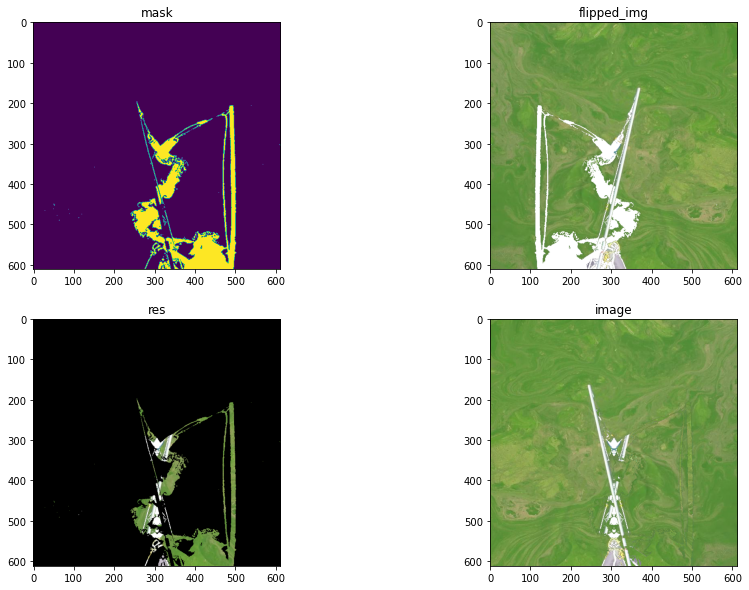

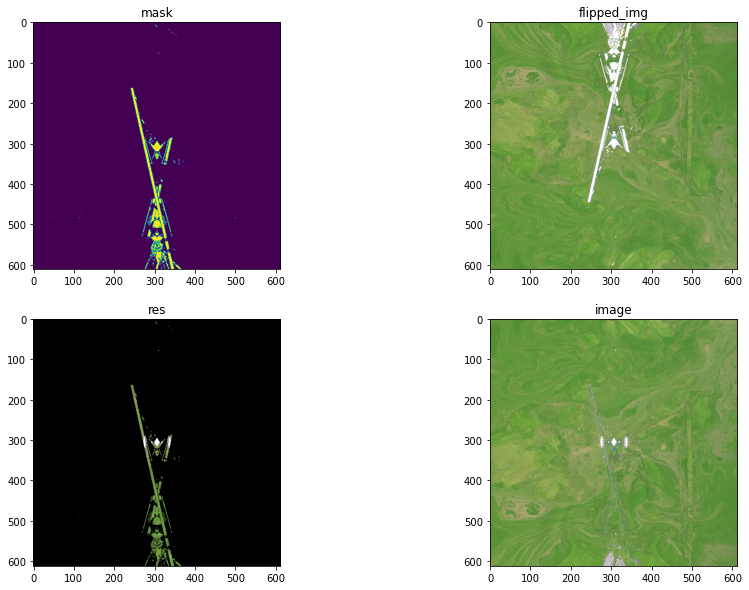

In [20]:
path = r'C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\train_val_change\271_1637053594.jpg'
path1 = r'C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\train_val_change\71_1638783960.jpg'
img,img_test,contours = remove_dirt(path1)

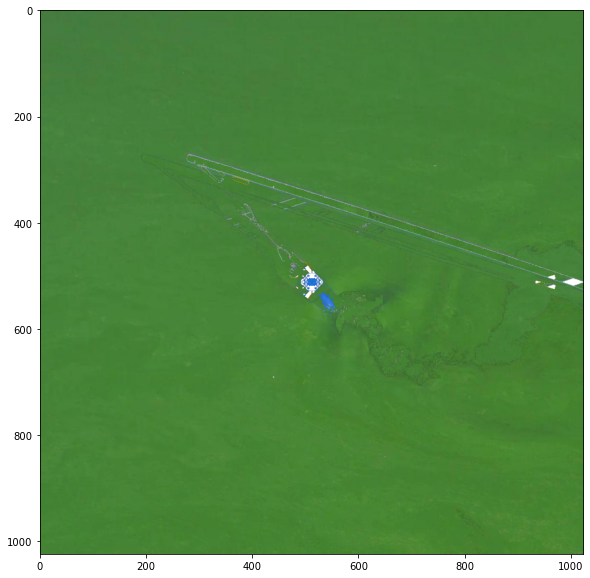

In [149]:
plt.figure(figsize=(10,10))
plt.imshow(img_test)

Biggest rec:
center:(499, 499),width:37,height:19,angle:75
[[485 483]
 [504 478]
 [513 515]
 [494 520]] 37 19 75
down_scale:5,x_move:18,angle:75
left 18
entered


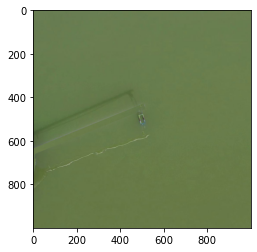

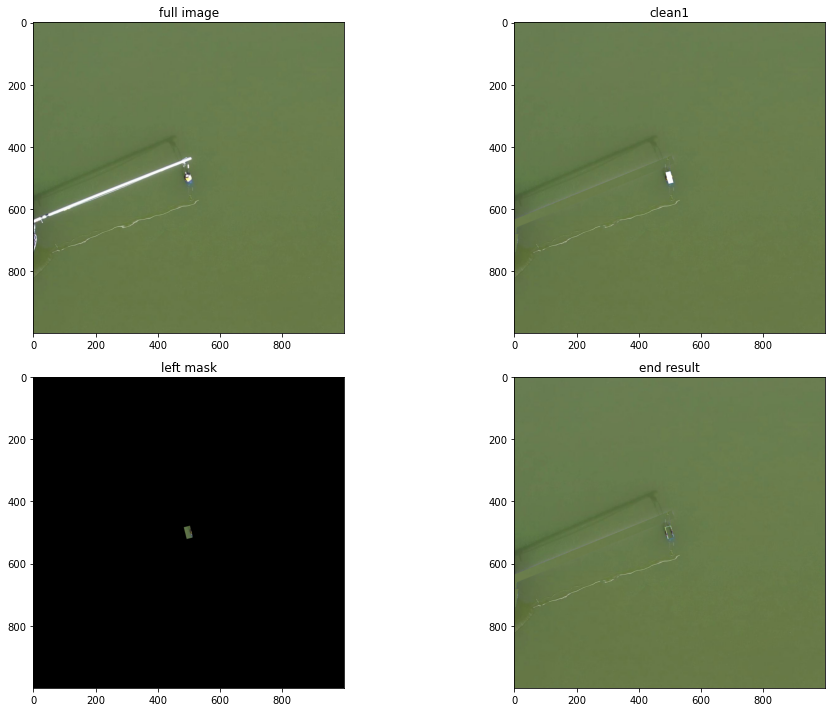

In [58]:
path = r'C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\1_1637051520.jpg'
i = CleanImage(path)
i.plot_steps()

Biggest rec:
center:(499, 499),width:37,height:19,angle:75
down_scale:5,x_move:18,angle:75
left 18
entered


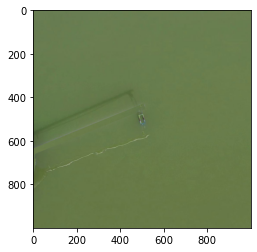

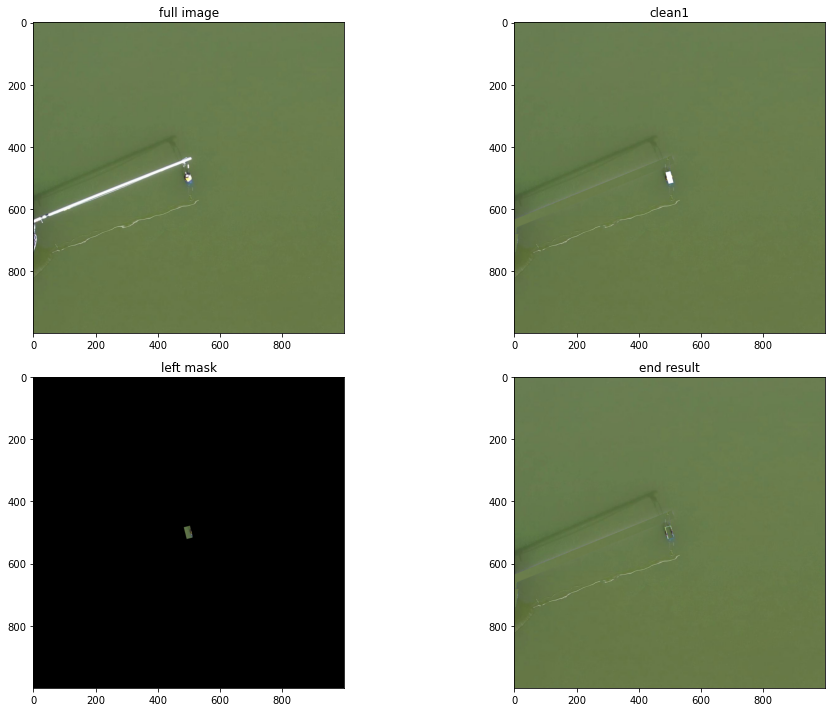

In [37]:
path = r'C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\1_1637051520.jpg'
i = CleanImage(path)
i.plot_steps()

Biggest rec:
center:(499, 499),width:19,height:291,angle:5
entered width<height [475 503 523 495]
side_scale:20,y_move:1


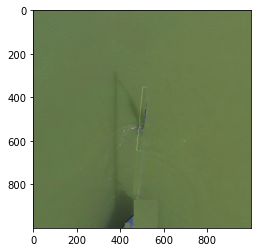

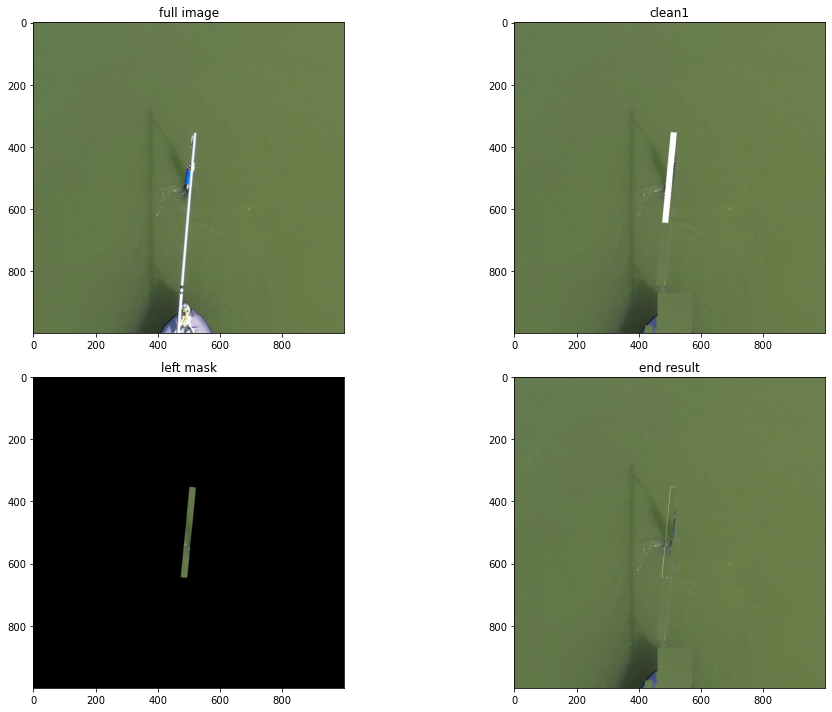

In [43]:
path = r'C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\1_1637051811.jpg'
i = CleanImage(path)
i.plot_steps()

Biggest rec:
center:(499, 499),width:21,height:289,angle:8
entered width<height [468 509 530 489]
side_scale:21,y_move:2


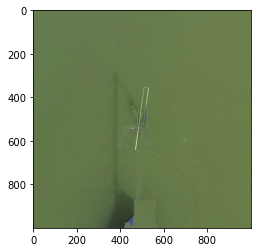

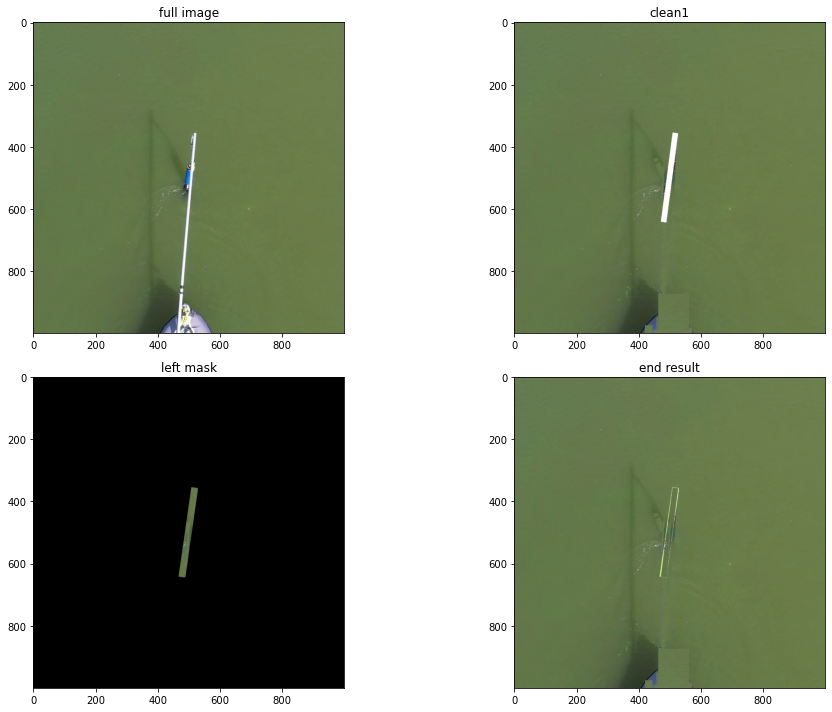

In [45]:
path = r'C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\1_1637051811.jpg'
i = CleanImage(path)
i.plot_steps()

In [69]:
# in case the df was grouped and we need to compare according to files in folder
from os import walk
mypath = r'C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat'
f = []
for (dirpath, dirnames, filenames) in walk(mypath):
    f.extend(filenames)
    
    
    break
n = []
[n.append(name)  if name.split('.')[1]=='jpg' else print(name) for name in f]

train_txt.txt
train_txt_chl.txt
validation_txt.txt
validation_txt_chl.txt


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

In [178]:
path = r'C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\train_val_change\validation_index_cat.txt'
with open(path,'r') as f:
    for line in f:
        line = line.strip().split()
        image_path = line[0]  # Image path is the first column
        category = line[1]  # Category is the second column
        i = CleanImage(image_path,int(category),experiment=False)
        i.save_result(r'C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\train_val_change\clean')

Biggest rec:
center:(415, 811),width:105,height:40,angle:90
down_scale:40,x_move:0,angle:0
left 0
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\train_val_change\clean\611_1638783978.jpg
Biggest rec:
center:(480, 480),width:114,height:20,angle:70
down_scale:7,x_move:19,angle:70
left 19
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\train_val_change\clean\1571_1637053346.jpg
Biggest rec:
center:(512, 511),width:53,height:11,angle:29
down_scale:10,x_move:5,angle:29
left 5
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\train_val_change\clean\6451_1637053509.jpg
Biggest rec:
center:(443, 443),width:51,height:4,angle:70
down_scale:1,x_move:2,angle:70
left 2
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_fixed\fixed\final_samples\data_split\train_val_change\clean\1655_1637052373.jpg
Biggest rec:


error: OpenCV(4.5.5) :-1: error: (-5:Bad argument) in function 'minAreaRect'
> Overload resolution failed:
>  - points is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'points'


In [5]:
with open(file_path, "r") as file:
    for line in file:
        line = line.strip().split()  # Split the line by whitespace
        image_path = line[0]  # Image path is the first column
        category = line[1]  # Category is the second column
        
        # Create the category folder if it doesn't exist
        category_folder = os.path.join(detination,category)
        os.makedirs(category_folder, exist_ok=True)

        # Copy the image to the category folder
        shutil.copy(image_path, category_folder)

<_io.TextIOWrapper name='C:\\Users\\urial\\BG\\AlphaBravo\\samples\\samples_fixed\\fixed\\final_samples\\data_split\\train_val_change\\validation_index_cat.txt' mode='r' encoding='cp1252'>


In [76]:
base_dir = r'C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat'
for name in n:
    path = os.path.join(base_dir,name)
# path = r'C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\8689_1637052479.jpg'
    i = CleanImage(path,experiment=False)
    i.save_result(r'C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean')

Biggest rec:
center:(499, 499),width:155,height:205,angle:9
entered width<height [405 440 593 558]
side_scale:153,y_move:24
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\1011_1638259716.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\1012_1637054072.jpg
Biggest rec:
center:(499, 499),width:72,height:16,angle:65
down_scale:7,x_move:15,angle:65
left 15
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\1012_1638785117.jpg
Biggest rec:
center:(499, 499),width:69,height:16,angle:52
down_scale:10,x_move:12,angle:52
left 12
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\1014_1638785117.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\1015_1637053490.jpg
Biggest rec:
center:(499, 499),

Biggest rec:
center:(202, 367),width:365,height:762,angle:13
entered width<height [-62 111 467 293]
side_scale:355,y_move:81
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\1057_1638784165.jpg
Biggest rec:
center:(499, 478),width:169,height:12,angle:60
down_scale:6,x_move:10,angle:60
left 10
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\1058_1638783583.jpg
Biggest rec:
center:(694, 231),width:610,height:463,angle:90
down_scale:463,x_move:0,angle:0
left 0
entered
337
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\1059_1638783874.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\1060_1637052515.jpg
Biggest rec:
center:(499, 499),width:225,height:15,angle:77
down_scale:3,x_move:12,angle:77
left 12
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clea

Biggest rec:
center:(499, 499),width:21,height:70,angle:26
entered width<height [474 505 525 493]
side_scale:19,y_move:9
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\1120_1637054075.jpg
Biggest rec:
center:(499, 499),width:113,height:28,angle:8
down_scale:28,x_move:3,angle:8
left 3
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\1120_1638785120.jpg
Biggest rec:
center:(498, 498),width:87,height:13,angle:45
down_scale:9,x_move:8,angle:45
left 8
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\1125_1637052227.jpg
Biggest rec:
center:(298, 615),width:597,height:767,angle:90
entered width<height [  0 597 597   0]
side_scale:597,y_move:0
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\1125_1638785120.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\cl

Biggest rec:
center:(499, 499),width:173,height:239,angle:90
entered width<height [413 586 586 413]
side_scale:173,y_move:0
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\115_1638259977.jpg
Biggest rec:
center:(499, 499),width:12,height:22,angle:12
entered width<height [491 495 507 503]
side_scale:12,y_move:2
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\1162_1637051559.jpg
Biggest rec:
center:(499, 499),width:13,height:25,angle:90
entered width<height [493 506 506 493]
side_scale:13,y_move:0
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\1167_1637051559.jpg
Biggest rec:
center:(499, 499),width:172,height:107,angle:57
down_scale:56,x_move:86,angle:57
left 86
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\1167_1638777573.jpg
Biggest rec:
center:(499, 499),width:171,height:109,angle:61
down_scale:52,x_move:93,angle:61
left 93
entered
image saved at:

Biggest rec:
center:(143, 143),width:287,height:287,angle:90
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\1222_1638783880.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\1223_1637053103.jpg
Biggest rec:
center:(143, 140),width:287,height:280,angle:90
down_scale:280,x_move:0,angle:0
left 0
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\1223_1638783880.jpg
Biggest rec:
center:(499, 499),width:89,height:196,angle:20
entered width<height [423 491 575 507]
side_scale:84,y_move:30
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\1223_1638784171.jpg
Biggest rec:
center:(142, 139),width:285,height:279,angle:90
down_scale:279,x_move:0,angle:0
left 0
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\1224_1638783880.jpg
Biggest rec:
center:(499, 499),widt

Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\1290_1637053790.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\1291_1638260016.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\1291_1638785126.jpg
Biggest rec:
center:(499, 499),width:41,height:35,angle:57
down_scale:19,x_move:29,angle:57
left 29
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\1292_1637054081.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\1293_1637053790.jpg
Biggest rec:
center:(512, 496),width:59,height:218,angle:76
entered width<height [398 611 625 412]
side_scale:14,y_move:56
image sav

Biggest rec:
center:(499, 499),width:55,height:18,angle:80
down_scale:3,x_move:17,angle:80
left 17
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\1325_1637052233.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\1325_1637052524.jpg
Biggest rec:
center:(255, 289),width:510,height:579,angle:0
entered width<height [  0   0 510 510]
side_scale:510,y_move:0
462
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\1326_1638783883.jpg
Biggest rec:
center:(499, 499),width:192,height:16,angle:71
down_scale:5,x_move:14,angle:71
left 14
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\1327_1638777579.jpg
Biggest rec:
center:(499, 499),width:12,height:58,angle:90
entered width<height [493 506 506 493]
side_scale:13,y_move:0
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_ca

Biggest rec:
center:(270, 302),width:541,height:604,angle:90
entered width<height [  0 541 541   0]
side_scale:541,y_move:0
418
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\1393_1638783886.jpg
Biggest rec:
center:(499, 499),width:80,height:27,angle:49
down_scale:18,x_move:20,angle:49
left 20
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\1395_1637053793.jpg
Biggest rec:
center:(499, 499),width:127,height:193,angle:90
entered width<height [436 563 563 436]
side_scale:127,y_move:0
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\1395_1638783595.jpg
Biggest rec:
center:(499, 258),width:999,height:517,angle:90
down_scale:517,x_move:0,angle:0
left 0
entered
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\1396_1637053502.jpg
Biggest rec:
center:(499, 499),width:60,height:228,angle:4
entered width<height [460 478 538 520]
side_scale:60,y_move:4
image s

Biggest rec:
center:(499, 499),width:46,height:224,angle:0
entered width<height [476 476 523 523]
side_scale:47,y_move:0
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\143_1638783553.jpg
Biggest rec:
center:(499, 499),width:12,height:27,angle:8
entered width<height [490 494 507 503]
side_scale:13,y_move:1
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\1440_1637051568.jpg
Biggest rec:
center:(499, 499),width:214,height:73,angle:85
down_scale:6,x_move:68,angle:85
left 68
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\1440_1638777582.jpg
Biggest rec:
center:(499, 499),width:76,height:18,angle:64
down_scale:8,x_move:16,angle:64
left 16
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\1447_1637051859.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\

Biggest rec:
center:(499, 499),width:227,height:23,angle:63
down_scale:11,x_move:21,angle:63
left 21
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\1491_1637052821.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\1491_1638783598.jpg
Biggest rec:
center:(499, 499),width:82,height:19,angle:75
down_scale:5,x_move:18,angle:75
left 18
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\1493_1637052239.jpg
Biggest rec:
center:(383, 105),width:792,height:276,angle:10
down_scale:271,x_move:47,angle:10
left 47
entered
471
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\1494_1638783889.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\1497_1637053112.jpg
Biggest rec:
center:(391, 146),width:78

500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\1554_1637053799.jpg
Biggest rec:
center:(420, 770),width:696,height:900,angle:58
entered width<height [-146  621  986  218]
side_scale:364,y_move:582
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\1555_1637053508.jpg
Biggest rec:
center:(499, 499),width:20,height:135,angle:61
entered width<height [435 554 563 444]
side_scale:9,y_move:16
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\1555_1638260025.jpg
Biggest rec:
center:(499, 499),width:26,height:161,angle:79
entered width<height [417 576 581 422]
side_scale:5,y_move:25
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\1556_1637054090.jpg
Biggest rec:
center:(499, 658),width:999,height:682,angle:90
down_scale:682,x_move:0,angle:0
left 0
entered
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\1558_1637053508.jpg
Bigges

Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\1595_1637052824.jpg
Biggest rec:
center:(499, 499),width:14,height:27,angle:15
entered width<height [488 496 510 502]
side_scale:14,y_move:3
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\1598_1637051574.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\1598_1637052533.jpg
Biggest rec:
center:(499, 498),width:109,height:171,angle:3
entered width<height [440 449 559 549]
side_scale:109,y_move:5
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\1598_1638777588.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\1599_1637052533.jpg
Biggest rec:
center:(499, 499),width:94,height:172,angle:3
en

Biggest rec:
center:(499, 499),width:84,height:24,angle:57
down_scale:13,x_move:20,angle:57
left 20
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\1662_1637053511.jpg
Biggest rec:
center:(499, 499),width:77,height:19,angle:67
down_scale:7,x_move:16,angle:67
left 16
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\1664_1637052245.jpg
Biggest rec:
center:(499, 499),width:95,height:91,angle:66
down_scale:37,x_move:83,angle:66
left 83
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\1664_1638259737.jpg
Biggest rec:
center:(499, 499),width:135,height:59,angle:90
down_scale:59,x_move:0,angle:0
left 0
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\1665_1637053802.jpg
Biggest rec:
center:(294, 137),width:588,height:274,angle:90
down_scale:274,x_move:0,angle:0
left 0
entered
444
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\sample

Biggest rec:
center:(499, 499),width:127,height:81,angle:86
down_scale:4,x_move:57,angle:86
left 57
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\1726_1638259740.jpg
Biggest rec:
center:(499, 499),width:126,height:92,angle:87
down_scale:4,x_move:76,angle:87
left 76
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\1728_1638259740.jpg
Biggest rec:
center:(499, 499),width:133,height:33,angle:33
down_scale:28,x_move:18,angle:33
left 18
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\1731_1637053805.jpg
Biggest rec:
center:(499, 499),width:42,height:111,angle:78
entered width<height [440 550 558 448]
side_scale:8,y_move:37
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\1733_1637054096.jpg
Biggest rec:
center:(499, 499),width:998,height:998,angle:0
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\1733_1638

Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\1767_1637052539.jpg
Biggest rec:
center:(499, 499),width:311,height:32,angle:84
down_scale:3,x_move:28,angle:84
left 28
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\1768_1637051870.jpg
Biggest rec:
center:(499, 499),width:35,height:19,angle:87
down_scale:1,x_move:19,angle:87
left 19
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\176_1637051526.jpg
Biggest rec:
center:(499, 469),width:998,height:938,angle:90
down_scale:938,x_move:0,angle:0
left 0
entered
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\1770_1637053121.jpg
Biggest rec:
center:(499, 499),width:117,height:171,angle:90
entered width<height [441 558 558 441]
side_scale:117,y_move:0
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\1771_

Biggest rec:
center:(499, 499),width:122,height:29,angle:60
down_scale:15,x_move:25,angle:60
left 25
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\1840_1637053517.jpg
Biggest rec:
center:(499, 499),width:173,height:89,angle:4
down_scale:89,x_move:6,angle:4
left 6
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\1841_1638259743.jpg
Biggest rec:
center:(499, 499),width:176,height:87,angle:4
down_scale:87,x_move:6,angle:4
left 6
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\1842_1638259743.jpg
Biggest rec:
center:(499, 499),width:303,height:15,angle:86
down_scale:1,x_move:14,angle:86
left 14
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\1843_1637051873.jpg
Biggest rec:
center:(499, 499),width:293,height:63,angle:61
down_scale:30,x_move:54,angle:61
left 54
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_cen

Biggest rec:
center:(499, 499),width:48,height:241,angle:14
entered width<height [445 506 553 492]
side_scale:47,y_move:11
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\1916_1638785147.jpg
Biggest rec:
center:(499, 499),width:111,height:29,angle:71
down_scale:9,x_move:26,angle:71
left 26
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\1917_1637053520.jpg
Biggest rec:
center:(498, 499),width:86,height:239,angle:13
entered width<height [428 484 568 512]
side_scale:84,y_move:19
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\1918_1638785147.jpg
Biggest rec:
center:(665, 499),width:668,height:999,angle:90
entered width<height [331 999 999 331]
side_scale:668,y_move:0
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\1926_1637054102.jpg
Biggest rec:
center:(499, 499),width:61,height:232,angle:16
entered width<height [437 501 561 497]
side_scale:60,y_mov

Biggest rec:
center:(499, 499),width:116,height:180,angle:20
entered width<height [413 476 585 522]
side_scale:109,y_move:39
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\1966_1638777600.jpg
Biggest rec:
center:(499, 499),width:91,height:192,angle:20
entered width<height [422 490 576 508]
side_scale:86,y_move:31
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\1972_1638777600.jpg
Biggest rec:
center:(499, 499),width:92,height:193,angle:20
entered width<height [422 490 576 508]
side_scale:86,y_move:31
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\1973_1638777600.jpg
Biggest rec:
center:(499, 499),width:85,height:192,angle:20
entered width<height [425 493 573 505]
side_scale:80,y_move:29
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\1974_1638777600.jpg
Biggest rec:
center:(499, 499),width:13,height:21,angle:7
entered width<height [491 494 507 504]
side_scal

500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\2031_1637052548.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\2031_1637052839.jpg
Biggest rec:
center:(499, 467),width:998,height:935,angle:90
down_scale:935,x_move:0,angle:0
left 0
entered
497
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\2031_1638783907.jpg
Biggest rec:
center:(499, 468),width:999,height:936,angle:90
down_scale:936,x_move:0,angle:0
left 0
entered
498
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\2032_1638783907.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\2033_1637052839.jpg
Biggest rec:
center:(499, 455),width:85,height:148,angle:39
entered width<height [419 513 579 485]
side_scale:66,y_move:53
image saved at:
C:\

Biggest rec:
center:(499, 499),width:94,height:21,angle:17
down_scale:21,x_move:6,angle:17
left 6
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\2103_1637053526.jpg
Biggest rec:
center:(499, 499),width:236,height:66,angle:88
down_scale:2,x_move:57,angle:88
left 57
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\2104_1638260043.jpg
Biggest rec:
center:(499, 499),width:46,height:256,angle:15
entered width<height [443 510 555 488]
side_scale:45,y_move:12
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\2105_1638785153.jpg
Biggest rec:
center:(499, 499),width:34,height:29,angle:32
down_scale:25,x_move:15,angle:32
left 15
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\2106_1637053526.jpg
Biggest rec:
center:(499, 452),width:64,height:26,angle:8
down_scale:26,x_move:3,angle:8
left 3
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\sample

Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\2141_1637052842.jpg
Biggest rec:
center:(589, 424),width:820,height:848,angle:90
entered width<height [179 999 999 179]
side_scale:820,y_move:0
424
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\2141_1638777606.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\2142_1637052551.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\2144_1637052551.jpg
Biggest rec:
center:(499, 499),width:8,height:246,angle:5
entered width<height [482 507 516 491]
side_scale:9,y_move:0
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\2144_1637053133.jpg
Biggest rec:
center:(499, 499),width:998,height:998,angle:

Biggest rec:
center:(505, 480),width:790,height:1001,angle:88
entered width<height [  -2  998 1013   12]
side_scale:14,y_move:400
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\2206_1638783913.jpg
Biggest rec:
center:(499, 499),width:120,height:34,angle:21
down_scale:32,x_move:12,angle:21
left 12
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\2207_1637053820.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\2208_1637054111.jpg
Biggest rec:
center:(499, 499),width:169,height:217,angle:90
entered width<height [415 584 584 415]
side_scale:169,y_move:0
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\2209_1638783622.jpg
Biggest rec:
center:(561, 485),width:412,height:1008,angle:6
entered width<height [296 415 825 706]
side_scale:410,y_move:43
500
image saved at:
C:\Users\urial\BG\Alpha

image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\2271_1637053532.jpg
Biggest rec:
center:(499, 499),width:133,height:35,angle:7
down_scale:35,x_move:4,angle:7
left 4
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\2271_1637053823.jpg
Biggest rec:
center:(499, 499),width:124,height:31,angle:61
down_scale:15,x_move:27,angle:61
left 27
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\2272_1637053532.jpg
Biggest rec:
center:(499, 499),width:155,height:43,angle:6
down_scale:43,x_move:4,angle:6
left 4
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\2273_1637053823.jpg
Biggest rec:
center:(499, 356),width:999,height:712,angle:90
down_scale:712,x_move:0,angle:0
left 0
entered
356
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\2273_1638259758.jpg
Biggest rec:
center:(499, 499),width:122,height:30,angle:64
down_scal

Biggest rec:
center:(499, 499),width:998,height:998,angle:0
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\2304_1637052848.jpg
Biggest rec:
center:(499, 499),width:998,height:998,angle:0
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\2304_1637053139.jpg
Biggest rec:
center:(499, 499),width:998,height:998,angle:0
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\2307_1637053139.jpg
Biggest rec:
center:(499, 499),width:18,height:180,angle:17
entered width<height [464 517 534 481]
side_scale:17,y_move:5
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\2308_1637052848.jpg
Biggest rec:
center:(499, 499),width:17,height:189,angle:17
entered width<height [462 519 536 479]
side_scale:17,y_move:5
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\2309_1637052848.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500

Biggest rec:
center:(499, 499),width:93,height:19,angle:57
down_scale:10,x_move:15,angle:57
left 15
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\2378_1637053535.jpg
Biggest rec:
center:(499, 499),width:109,height:34,angle:55
down_scale:20,x_move:28,angle:55
left 28
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\2379_1637053826.jpg
Biggest rec:
center:(319, 160),width:638,height:321,angle:90
down_scale:321,x_move:0,angle:0
left 0
entered
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\237_1638784138.jpg
Biggest rec:
center:(499, 499),width:125,height:22,angle:61
down_scale:11,x_move:19,angle:61
left 19
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\2381_1637053535.jpg
Biggest rec:
center:(499, 450),width:999,height:900,angle:90
down_scale:900,x_move:0,angle:0
left 0
entered
450
image saved at:
C:\Users\urial\BG\AlphaBravo\sample

Biggest rec:
center:(499, 499),width:267,height:39,angle:69
down_scale:14,x_move:36,angle:69
left 36
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\2426_1638777615.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\2427_1637051601.jpg
Biggest rec:
center:(499, 499),width:254,height:51,angle:69
down_scale:18,x_move:46,angle:69
left 46
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\2427_1638777615.jpg
Biggest rec:
center:(499, 499),width:16,height:68,angle:11
entered width<height [484 498 514 500]
side_scale:16,y_move:3
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\243_1637052197.jpg
Biggest rec:
center:(499, 348),width:998,height:696,angle:0
down_scale:696,x_move:0,angle:0
entered
349
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\2449_16382597

Biggest rec:
center:(594, 618),width:1043,height:570,angle:40
down_scale:434,x_move:364,angle:40
left 364
entered
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\2490_1638783922.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\2491_1637052272.jpg
Biggest rec:
center:(499, 499),width:16,height:82,angle:37
entered width<height [467 517 531 481]
side_scale:14,y_move:10
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\2492_1637052563.jpg
Biggest rec:
center:(499, 499),width:300,height:28,angle:76
down_scale:7,x_move:28,angle:76
left 28
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\2493_1637051894.jpg
Biggest rec:
center:(499, 499),width:79,height:229,angle:90
entered width<height [460 539 539 460]
side_scale:79,y_move:0
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_cent

460
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\2554_1637053832.jpg
Biggest rec:
center:(505, 483),width:38,height:142,angle:43
entered width<height [442 541 568 470]
side_scale:28,y_move:26
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\2554_1637054123.jpg
Biggest rec:
center:(499, 430),width:999,height:861,angle:90
down_scale:861,x_move:0,angle:0
left 0
entered
431
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\2556_1638259767.jpg
Biggest rec:
center:(500, 483),width:36,height:110,angle:41
entered width<height [450 522 550 477]
side_scale:27,y_move:23
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\2558_1637054123.jpg
Biggest rec:
center:(499, 499),width:54,height:45,angle:17
down_scale:43,x_move:13,angle:17
left 13
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\2562_1637053541.jpg
Biggest rec:
center:(499, 459)

Biggest rec:
center:(499, 499),width:14,height:213,angle:6
entered width<height [480 504 518 494]
side_scale:14,y_move:1
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\2595_1637052857.jpg
Biggest rec:
center:(499, 499),width:26,height:176,angle:1
entered width<height [483 488 515 510]
side_scale:27,y_move:0
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\2599_1638777621.jpg
Biggest rec:
center:(499, 499),width:133,height:187,angle:90
entered width<height [433 566 566 433]
side_scale:133,y_move:0
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\259_1637052779.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\259_1637053070.jpg
Biggest rec:
center:(499, 499),width:17,height:74,angle:12
entered width<height [482 498 516 500]
side_scale:18,y_move:3
image saved at:
C:\Users\urial\BG\AlphaBravo\sampl

Biggest rec:
center:(499, 496),width:82,height:23,angle:86
down_scale:1,x_move:14,angle:86
left 14
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\2670_1637052569.jpg
Biggest rec:
center:(499, 499),width:15,height:202,angle:8
entered width<height [477 506 521 492]
side_scale:15,y_move:2
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\2671_1637052860.jpg
Biggest rec:
center:(499, 499),width:73,height:20,angle:66
down_scale:8,x_move:17,angle:66
left 17
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\2671_1638783637.jpg
Biggest rec:
center:(499, 499),width:275,height:116,angle:47
down_scale:79,x_move:84,angle:47
left 84
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\2672_1637052278.jpg
Biggest rec:
center:(499, 499),width:255,height:31,angle:79
down_scale:5,x_move:25,angle:79
left 25
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\sa

Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\2736_1638260064.jpg
Biggest rec:
center:(499, 499),width:115,height:23,angle:24
down_scale:21,x_move:9,angle:24
left 9
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\2737_1637053547.jpg
Biggest rec:
center:(499, 480),width:95,height:18,angle:2
down_scale:19,x_move:0,angle:2
left 0
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\2737_1638259773.jpg
Biggest rec:
center:(499, 499),width:116,height:28,angle:25
down_scale:26,x_move:12,angle:25
left 12
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\2739_1637053547.jpg
Biggest rec:
center:(499, 499),width:79,height:285,angle:90
entered width<height [460 539 539 460]
side_scale:79,y_move:0
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\273_163705182

Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\2792_1637051613.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\2793_1637051613.jpg
Biggest rec:
center:(657, 295),width:203,height:522,angle:68
entered width<height [376 864 937 449]
side_scale:73,y_move:180
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\27_1637054039.jpg
Biggest rec:
center:(499, 482),width:91,height:14,angle:3
down_scale:14,x_move:0,angle:3
left 0
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\2804_1638259776.jpg
Biggest rec:
center:(499, 499),width:998,height:998,angle:0
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\2810_1637053841.jpg
Biggest rec:
center:(499, 499),width:85,height:29,angle:26
down_scale:26,x_

Biggest rec:
center:(499, 499),width:91,height:295,angle:90
entered width<height [454 545 545 454]
side_scale:91,y_move:0
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\2852_1637052284.jpg
Biggest rec:
center:(499, 499),width:191,height:41,angle:89
down_scale:1,x_move:57,angle:89
left 57
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\2855_1638777630.jpg
Biggest rec:
center:(647, 598),width:784,height:512,angle:33
down_scale:426,x_move:276,angle:33
left 276
entered
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\2856_1638783934.jpg
Biggest rec:
center:(499, 499),width:67,height:196,angle:11
entered width<height [446 486 552 512]
side_scale:66,y_move:12
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\2858_1638777630.jpg
Biggest rec:
center:(499, 499),width:293,height:19,angle:68
down_scale:7,x_move:17,angle:68
left 17
entered
image saved at:
C:\Use

Biggest rec:
center:(499, 499),width:155,height:192,angle:0
entered width<height [420 422 578 576]
side_scale:158,y_move:0
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\292_1638259983.jpg
Biggest rec:
center:(499, 499),width:101,height:22,angle:72
down_scale:7,x_move:21,angle:72
left 21
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\2931_1637051909.jpg
Biggest rec:
center:(499, 499),width:147,height:240,angle:0
entered width<height [424 427 574 571]
side_scale:150,y_move:0
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\2931_1638783646.jpg
Biggest rec:
center:(499, 499),width:229,height:21,angle:89
down_scale:1,x_move:57,angle:89
left 57
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\2932_1638783646.jpg
Biggest rec:
center:(499, 499),width:103,height:24,angle:63
down_scale:11,x_move:21,angle:63
left 21
entered
image saved at:
C:\Users\urial

image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\2993_1637053556.jpg
Biggest rec:
center:(499, 499),width:998,height:998,angle:0
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\2993_1637053847.jpg
Biggest rec:
center:(499, 499),width:43,height:182,angle:56
entered width<height [411 564 587 434]
side_scale:23,y_move:34
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\2994_1638260073.jpg
Biggest rec:
center:(499, 499),width:115,height:24,angle:35
down_scale:20,x_move:14,angle:35
left 14
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\2998_1637053556.jpg
Biggest rec:
center:(499, 499),width:61,height:32,angle:23
down_scale:30,x_move:12,angle:23
left 12
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\2999_1637053847.jpg
Biggest rec:
center:(312, 499),width:624,height:998,angle:0
entered width<height [  0   0 624 62

Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\302_1637054048.jpg
Biggest rec:
center:(499, 499),width:307,height:90,angle:64
down_scale:38,x_move:77,angle:64
left 77
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\3032_1637052290.jpg
Biggest rec:
center:(499, 499),width:36,height:290,angle:19
entered width<height [434 529 564 469]
side_scale:35,y_move:12
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\3033_1637052581.jpg
Biggest rec:
center:(499, 499),width:262,height:41,angle:73
down_scale:13,x_move:42,angle:73
left 42
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\3033_1638777636.jpg
Biggest rec:
center:(499, 336),width:998,height:673,angle:90
down_scale:673,x_move:0,angle:0
left 0
entered
337
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\303

Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\3099_1637054141.jpg
Biggest rec:
center:(499, 380),width:998,height:761,angle:90
down_scale:761,x_move:0,angle:0
left 0
entered
381
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\30_1637053457.jpg
Biggest rec:
center:(499, 491),width:999,height:983,angle:90
down_scale:983,x_move:0,angle:0
left 0
entered
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\3100_1637053559.jpg
Biggest rec:
center:(499, 413),width:999,height:826,angle:90
down_scale:826,x_move:0,angle:0
left 0
entered
413
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\3105_1638783652.jpg
Biggest rec:
center:(719, 373),width:559,height:747,angle:90
entered width<height [440 999 999 440]
side_scale:559,y_move:0
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat

Biggest rec:
center:(499, 499),width:62,height:21,angle:77
down_scale:5,x_move:21,angle:77
left 21
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\3146_1637051625.jpg
Biggest rec:
center:(499, 499),width:16,height:59,angle:10
entered width<height [486 496 512 502]
side_scale:16,y_move:2
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\315_1637052200.jpg
Biggest rec:
center:(803, 295),width:391,height:590,angle:90
entered width<height [608 999 999 608]
side_scale:391,y_move:0
461
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\315_1638783850.jpg
Biggest rec:
center:(499, 492),width:999,height:985,angle:90
down_scale:985,x_move:0,angle:0
left 0
entered
493
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\3164_1638259788.jpg
Biggest rec:
center:(499, 499),width:128,height:25,angle:14
down_scale:25,x_move:6,angle:14
left 6
entered
image saved at:
C:\Users\ur

Biggest rec:
center:(499, 499),width:103,height:23,angle:64
down_scale:10,x_move:20,angle:64
left 20
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\3209_1637051918.jpg
Biggest rec:
center:(499, 499),width:94,height:23,angle:81
down_scale:3,x_move:18,angle:81
left 18
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\3209_1637052587.jpg
Biggest rec:
center:(499, 499),width:161,height:14,angle:81
down_scale:2,x_move:12,angle:81
left 12
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\3212_1637052878.jpg
Biggest rec:
center:(499, 499),width:157,height:231,angle:90
entered width<height [421 578 578 421]
side_scale:157,y_move:0
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\3212_1638783655.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\3213_16

Biggest rec:
center:(499, 499),width:35,height:339,angle:6
entered width<height [462 500 536 498]
side_scale:36,y_move:3
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\3287_1637052590.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\3287_1637054147.jpg
Biggest rec:
center:(499, 499),width:132,height:274,angle:6
entered width<height [418 448 580 550]
side_scale:132,y_move:13
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\3288_1637052299.jpg
Biggest rec:
center:(499, 499),width:998,height:998,angle:0
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\3289_1637053172.jpg
Biggest rec:
center:(499, 380),width:999,height:761,angle:90
down_scale:761,x_move:0,angle:0
left 0
entered
381
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\3289_1637053856.jpg
Biggest rec:
c

Biggest rec:
center:(499, 499),width:157,height:102,angle:89
down_scale:1,x_move:57,angle:89
left 57
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\3325_1638777645.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\332_1637053073.jpg
Biggest rec:
center:(499, 480),width:999,height:960,angle:90
down_scale:960,x_move:0,angle:0
left 0
entered
480
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\3349_1638259794.jpg
Biggest rec:
center:(499, 423),width:998,height:846,angle:0
down_scale:846,x_move:0,angle:0
entered
424
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\3350_1637053568.jpg
Biggest rec:
center:(499, 481),width:999,height:962,angle:90
down_scale:962,x_move:0,angle:0
left 0
entered
481
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\3350_1638259794.jpg

500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\3392_1638783952.jpg
Biggest rec:
center:(499, 499),width:132,height:41,angle:83
down_scale:5,x_move:40,angle:83
left 40
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\3393_1638777648.jpg
Biggest rec:
center:(499, 499),width:114,height:22,angle:63
down_scale:10,x_move:19,angle:63
left 19
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\3394_1637051924.jpg
Biggest rec:
center:(499, 382),width:999,height:764,angle:90
down_scale:764,x_move:0,angle:0
left 0
entered
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\3394_1638783952.jpg
Biggest rec:
center:(499, 499),width:18,height:359,angle:11
entered width<height [453 527 545 471]
side_scale:18,y_move:3
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\3395_1637052593.jpg
Biggest rec:
center:(499, 499),width:13,heigh

Biggest rec:
center:(499, 591),width:999,height:815,angle:0
down_scale:815,x_move:0,angle:0
entered
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\3448_1637053862.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\3448_1637054153.jpg
Biggest rec:
center:(423, 350),width:847,height:701,angle:90
down_scale:701,x_move:0,angle:0
left 0
entered
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\344_1638784141.jpg
Biggest rec:
center:(499, 499),width:197,height:90,angle:59
down_scale:46,x_move:76,angle:59
left 76
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\3453_1638260088.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\3454_1637054153.jpg
Biggest rec:
center:(499, 499),width:999,heigh

Biggest rec:
center:(499, 499),width:28,height:253,angle:2
entered width<height [479 490 519 508]
side_scale:29,y_move:1
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\3495_1637051637.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\3495_1637053178.jpg
Biggest rec:
center:(499, 499),width:195,height:93,angle:80
down_scale:15,x_move:85,angle:80
left 85
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\3495_1638777651.jpg
Biggest rec:
center:(499, 499),width:188,height:81,angle:83
down_scale:9,x_move:73,angle:83
left 73
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\3497_1638777651.jpg
Biggest rec:
center:(761, 579),width:451,height:597,angle:9
entered width<height [ 489  588 1033  934]
side_scale:445,y_move:70
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_cent

Biggest rec:
center:(499, 499),width:34,height:318,angle:2
entered width<height [475 489 523 509]
side_scale:34,y_move:1
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\3574_1637051930.jpg
Biggest rec:
center:(499, 477),width:84,height:343,angle:4
entered width<height [444 470 554 528]
side_scale:84,y_move:5
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\3574_1637052308.jpg
Biggest rec:
center:(499, 499),width:243,height:31,angle:80
down_scale:5,x_move:28,angle:80
left 28
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\3574_1638783667.jpg
Biggest rec:
center:(499, 499),width:26,height:256,angle:0
entered width<height [485 487 513 511]
side_scale:28,y_move:0
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\3575_1637051640.jpg
Biggest rec:
center:(499, 499),width:998,height:998,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_cen

Biggest rec:
center:(499, 499),width:10,height:340,angle:90
entered width<height [494 505 505 494]
side_scale:11,y_move:0
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\3643_1637051933.jpg
Biggest rec:
center:(499, 499),width:291,height:34,angle:83
down_scale:4,x_move:32,angle:83
left 32
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\3646_1637052602.jpg
Biggest rec:
center:(499, 499),width:111,height:39,angle:12
down_scale:38,x_move:8,angle:12
left 8
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\3646_1637053868.jpg
Biggest rec:
center:(587, 499),width:823,height:999,angle:90
entered width<height [176 999 999 176]
side_scale:823,y_move:0
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\3646_1638783961.jpg
Biggest rec:
center:(499, 499),width:16,height:351,angle:1
entered width<height [487 495 511 503]
side_scale:16,y_move:0
image saved at

Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\3718_1637053871.jpg
Biggest rec:
center:(499, 499),width:207,height:171,angle:90
down_scale:171,x_move:0,angle:0
left 0
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\3719_1638260097.jpg
Biggest rec:
center:(499, 499),width:164,height:28,angle:47
down_scale:19,x_move:20,angle:47
left 20
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\3721_1637053580.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\3723_1637053871.jpg
Biggest rec:
center:(499, 499),width:29,height:181,angle:69
entered width<height [409 579 589 419]
side_scale:10,y_move:26
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\3723_1638259806.jpg
Biggest rec:
center:(499, 499)

Biggest rec:
center:(499, 500),width:175,height:89,angle:81
down_scale:14,x_move:88,angle:81
left 88
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\3769_1638777660.jpg
Biggest rec:
center:(499, 499),width:168,height:86,angle:80
down_scale:14,x_move:79,angle:80
left 79
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\3773_1638777660.jpg
Biggest rec:
center:(499, 499),width:166,height:82,angle:79
down_scale:14,x_move:72,angle:79
left 72
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\3774_1638777660.jpg
Biggest rec:
center:(499, 363),width:134,height:584,angle:21
entered width<height [331 541 667 457]
side_scale:126,y_move:48
364
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\377_1638259695.jpg
Biggest rec:
center:(499, 499),width:256,height:25,angle:84
down_scale:3,x_move:28,angle:84
left 28
entered
image saved at:
C:\Users\urial\BG\Alp

Biggest rec:
center:(499, 499),width:102,height:22,angle:64
down_scale:9,x_move:18,angle:64
left 18
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\3844_1637052608.jpg
Biggest rec:
center:(499, 499),width:193,height:90,angle:83
down_scale:10,x_move:81,angle:83
left 81
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\3844_1638777663.jpg
Biggest rec:
center:(550, 499),width:898,height:999,angle:90
entered width<height [101 999 999 101]
side_scale:898,y_move:0
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\3844_1638783967.jpg
Biggest rec:
center:(499, 499),width:91,height:24,angle:67
down_scale:9,x_move:21,angle:67
left 21
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\3845_1637052608.jpg
Biggest rec:
center:(499, 499),width:171,height:204,angle:0
entered width<height [412 415 586 583]
side_scale:174,y_move:0
image saved at:
C:\Users\

Biggest rec:
center:(499, 499),width:110,height:166,angle:4
entered width<height [437 450 561 548]
side_scale:111,y_move:7
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\3914_1638260103.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\3915_1637052320.jpg
Biggest rec:
center:(499, 499),width:309,height:44,angle:89
down_scale:1,x_move:57,angle:89
left 57
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\3916_1637052320.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\3916_1637054168.jpg
Biggest rec:
center:(395, 499),width:790,height:999,angle:90
entered width<height [  0 790 790   0]
side_scale:790,y_move:0
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\3917_1637052320.jpg
Biggest rec

Biggest rec:
center:(499, 499),width:46,height:28,angle:47
down_scale:20,x_move:21,angle:47
left 21
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\3978_1637053589.jpg
Biggest rec:
center:(499, 499),width:127,height:161,angle:90
entered width<height [436 563 563 436]
side_scale:127,y_move:0
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\3980_1638260106.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\3981_1637054171.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\3985_1637054171.jpg
Biggest rec:
center:(499, 499),width:101,height:173,angle:90
entered width<height [449 550 550 449]
side_scale:101,y_move:0
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\3985_1638260106.jpg
Biggest rec:
c

Biggest rec:
center:(499, 499),width:317,height:23,angle:87
down_scale:1,x_move:19,angle:87
left 19
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\4018_1637051945.jpg
Biggest rec:
center:(499, 499),width:998,height:998,angle:0
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\4018_1638783973.jpg
Biggest rec:
center:(499, 499),width:91,height:301,angle:12
entered width<height [420 488 578 510]
side_scale:90,y_move:19
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\4019_1637052323.jpg
Biggest rec:
center:(499, 499),width:18,height:398,angle:15
entered width<height [438 543 561 455]
side_scale:17,y_move:4
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\401_1637053469.jpg
Biggest rec:
center:(350, 499),width:700,height:999,angle:90
entered width<height [  0 700 700   0]
side_scale:700,y_move:0
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\sam

Biggest rec:
center:(499, 499),width:136,height:80,angle:58
down_scale:42,x_move:67,angle:58
left 67
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\4089_1638260109.jpg
Biggest rec:
center:(499, 499),width:20,height:57,angle:8
entered width<height [485 493 513 505]
side_scale:20,y_move:2
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\408_1637052203.jpg
Biggest rec:
center:(499, 372),width:999,height:744,angle:90
down_scale:744,x_move:0,angle:0
left 0
entered
372
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\408_1637052494.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\408_1637054342.jpg
Biggest rec:
center:(499, 499),width:149,height:171,angle:90
entered width<height [425 574 574 425]
side_scale:149,y_move:0
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat

Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\4123_1637052908.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\4123_1637053199.jpg
Biggest rec:
center:(499, 499),width:196,height:33,angle:70
down_scale:11,x_move:30,angle:70
left 30
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\4125_1638777672.jpg
Biggest rec:
center:(499, 499),width:256,height:7,angle:76
down_scale:2,x_move:8,angle:76
left 8
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\4127_1637051658.jpg
Biggest rec:
center:(499, 499),width:258,height:9,angle:78
down_scale:2,x_move:9,angle:78
left 9
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\4129_1637051658.jpg
Biggest rec:
center:(499, 499),width:54,height:194,

Biggest rec:
center:(636, 217),width:177,height:612,angle:43
entered width<height [360 784 912 489]
side_scale:129,y_move:120
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\4192_1638783979.jpg
Biggest rec:
center:(499, 499),width:326,height:17,angle:87
down_scale:1,x_move:19,angle:87
left 19
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\4196_1637052620.jpg
Biggest rec:
center:(499, 499),width:556,height:44,angle:48
down_scale:30,x_move:33,angle:48
left 33
entered
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\4199_1638783979.jpg
Biggest rec:
center:(499, 499),width:18,height:52,angle:8
entered width<height [486 494 512 504]
side_scale:18,y_move:2
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\419_1637052203.jpg
Biggest rec:
center:(499, 359),width:999,height:719,angle:90
down_scale:719,x_move:0,angle:0
left 0
entered
360
image saved at:
C:

Biggest rec:
center:(499, 356),width:999,height:713,angle:90
down_scale:713,x_move:0,angle:0
left 0
entered
357
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\425_1637052494.jpg
Biggest rec:
center:(499, 499),width:15,height:172,angle:50
entered width<height [428 560 570 438]
side_scale:10,y_move:11
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\4261_1638259824.jpg
Biggest rec:
center:(499, 499),width:643,height:55,angle:20
down_scale:52,x_move:18,angle:20
left 18
entered
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\4265_1637053598.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\4265_1637054180.jpg
Biggest rec:
center:(499, 499),width:614,height:50,angle:7
down_scale:50,x_move:6,angle:7
left 6
entered
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean

Biggest rec:
center:(499, 499),width:16,height:271,angle:10
entered width<height [465 516 533 482]
side_scale:17,y_move:2
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\4308_1637051664.jpg
Biggest rec:
center:(499, 451),width:999,height:903,angle:90
down_scale:903,x_move:0,angle:0
left 0
entered
452
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\4312_1638777678.jpg
Biggest rec:
center:(675, 400),width:647,height:801,angle:90
entered width<height [352 999 999 352]
side_scale:647,y_move:0
401
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\4316_1638777678.jpg
Biggest rec:
center:(689, 389),width:617,height:779,angle:0
entered width<height [380 380 998 998]
side_scale:618,y_move:0
390
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\4317_1638777678.jpg
Biggest rec:
center:(656, 372),width:683,height:745,angle:0
entered width<height [314 314 998 998]
side_scale:6

Biggest rec:
center:(499, 499),width:998,height:998,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\4382_1637052917.jpg
Biggest rec:
center:(499, 499),width:244,height:15,angle:84
down_scale:2,x_move:19,angle:84
left 19
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\4382_1638783694.jpg
Biggest rec:
center:(499, 499),width:108,height:24,angle:58
down_scale:12,x_move:19,angle:58
left 19
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\4383_1637051957.jpg
Biggest rec:
center:(499, 499),width:10,height:273,angle:34
entered width<height [418 571 580 427]
side_scale:9,y_move:6
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\4384_1637051667.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\4384_1637052917.jpg
Biggest rec:
center:(499, 499),w

Biggest rec:
center:(499, 499),width:77,height:155,angle:90
entered width<height [461 538 538 461]
side_scale:77,y_move:0
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\4452_1638260121.jpg
Biggest rec:
center:(499, 499),width:301,height:29,angle:88
down_scale:1,x_move:28,angle:88
left 28
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\4454_1637052338.jpg
Biggest rec:
center:(727, 143),width:543,height:287,angle:90
down_scale:287,x_move:0,angle:0
left 0
entered
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\4454_1638783988.jpg
Biggest rec:
center:(499, 499),width:118,height:22,angle:56
down_scale:13,x_move:19,angle:56
left 19
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\4455_1637051960.jpg
Biggest rec:
center:(731, 139),width:535,height:278,angle:90
down_scale:278,x_move:0,angle:0
left 0
entered
500
image saved at:
C:\Users\urial\BG\Alp

Biggest rec:
center:(499, 499),width:169,height:43,angle:89
down_scale:1,x_move:57,angle:89
left 57
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\4524_1638259833.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\4525_1637054189.jpg
Biggest rec:
center:(560, 336),width:255,height:81,angle:6
down_scale:81,x_move:8,angle:6
left 8
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\4526_1637053607.jpg
Biggest rec:
center:(499, 499),width:59,height:179,angle:14
entered width<height [448 492 550 506]
side_scale:58,y_move:14
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\4527_1638259833.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\4529_1637054189.jpg
Biggest rec:
center:(499, 484),wid

Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\4572_1637052923.jpg
Biggest rec:
center:(499, 499),width:20,height:299,angle:38
entered width<height [398 583 600 415]
side_scale:17,y_move:13
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\4573_1637051673.jpg
Biggest rec:
center:(499, 499),width:20,height:304,angle:38
entered width<height [396 586 602 412]
side_scale:16,y_move:12
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\4574_1637051673.jpg
Biggest rec:
center:(499, 499),width:231,height:34,angle:74
down_scale:9,x_move:31,angle:74
left 31
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\4574_1638777687.jpg
Biggest rec:
center:(499, 499),width:16,height:294,angle:38
entered width<height [402 583 596 415]
side_scale:13,y_move:10
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\sampl

Biggest rec:
center:(499, 499),width:89,height:25,angle:84
down_scale:3,x_move:28,angle:84
left 28
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\4651_1637052635.jpg
Biggest rec:
center:(499, 499),width:25,height:95,angle:90
entered width<height [487 512 512 487]
side_scale:25,y_move:0
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\4652_1637052635.jpg
Biggest rec:
center:(499, 499),width:203,height:35,angle:72
down_scale:11,x_move:33,angle:72
left 33
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\4654_1638777690.jpg
Biggest rec:
center:(499, 499),width:188,height:190,angle:0
entered width<height [405 405 594 594]
side_scale:189,y_move:0
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\4655_1638783703.jpg
Biggest rec:
center:(365, 499),width:730,height:999,angle:90
entered width<height [  0 730 730   0]
side_scale:730,y_move:0
500
image saved 

Biggest rec:
center:(499, 499),width:27,height:114,angle:82
entered width<height [441 554 557 444]
side_scale:3,y_move:21
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\4725_1637053904.jpg
Biggest rec:
center:(499, 499),width:191,height:203,angle:90
entered width<height [404 595 595 404]
side_scale:191,y_move:0
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\4725_1638783706.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\4725_1638783997.jpg
Biggest rec:
center:(499, 499),width:105,height:25,angle:65
down_scale:11,x_move:23,angle:65
left 23
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\4726_1637052638.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\4726_1638783997.jpg
Biggest rec:
ce

Biggest rec:
center:(499, 385),width:999,height:770,angle:90
down_scale:770,x_move:0,angle:0
left 0
entered
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\4800_1637053616.jpg
Biggest rec:
center:(499, 499),width:30,height:110,angle:80
entered width<height [442 551 556 447]
side_scale:5,y_move:28
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\4800_1637053907.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\4801_1637054198.jpg
Biggest rec:
center:(499, 499),width:28,height:107,angle:83
entered width<height [444 551 554 447]
side_scale:3,y_move:24
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\4804_1637053907.jpg
Biggest rec:
center:(499, 277),width:998,height:554,angle:90
down_scale:554,x_move:0,angle:0
left 0
entered
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_center

Biggest rec:
center:(499, 499),width:194,height:45,angle:72
down_scale:14,x_move:43,angle:72
left 43
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\4854_1638777696.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\4856_1637051682.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\4859_1637051682.jpg
Biggest rec:
center:(499, 499),width:20,height:393,angle:2
entered width<height [479 499 519 499]
side_scale:20,y_move:0
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\485_1637053472.jpg
Biggest rec:
center:(499, 500),width:66,height:31,angle:23
down_scale:29,x_move:12,angle:23
left 12
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\485_1637053763.jpg
Biggest rec:
center:(499, 422),wid

Biggest rec:
center:(499, 815),width:999,height:368,angle:90
down_scale:368,x_move:0,angle:0
left 0
entered
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\4910_1638784003.jpg
Biggest rec:
center:(499, 805),width:999,height:388,angle:0
down_scale:388,x_move:0,angle:0
entered
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\4913_1638784003.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\4914_1637052935.jpg
Biggest rec:
center:(499, 499),width:125,height:260,angle:23
entered width<height [390 493 608 505]
side_scale:115,y_move:48
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\4915_1637052353.jpg
Biggest rec:
center:(499, 490),width:129,height:178,angle:90
entered width<height [435 564 564 435]
side_scale:129,y_move:0
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_

Biggest rec:
center:(499, 499),width:118,height:171,angle:1
entered width<height [438 442 560 556]
side_scale:118,y_move:2
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\4979_1638259848.jpg
Biggest rec:
center:(499, 499),width:38,height:122,angle:76
entered width<height [435 554 563 444]
side_scale:9,y_move:36
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\497_1637054054.jpg
Biggest rec:
center:(499, 499),width:99,height:26,angle:65
down_scale:11,x_move:23,angle:65
left 23
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\4984_1637051978.jpg
Biggest rec:
center:(499, 499),width:998,height:998,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\4984_1637053622.jpg
Biggest rec:
center:(499, 499),width:998,height:998,angle:0
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\4985_1637053622.jpg
Biggest rec:
center

Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\5023_1637052938.jpg
Biggest rec:
center:(499, 499),width:232,height:48,angle:58
down_scale:25,x_move:40,angle:58
left 40
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\5029_1638777702.jpg
Biggest rec:
center:(499, 499),width:16,height:60,angle:9
entered width<height [486 496 512 502]
side_scale:16,y_move:2
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\502_1637052206.jpg
Biggest rec:
center:(499, 499),width:227,height:40,angle:59
down_scale:20,x_move:33,angle:59
left 33
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\5032_1638777702.jpg
Biggest rec:
center:(499, 499),width:237,height:36,angle:60
down_scale:18,x_move:31,angle:60
left 31
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\5036_1638

Biggest rec:
center:(149, 499),width:297,height:998,angle:90
entered width<height [  0 297 297   0]
side_scale:297,y_move:0
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\5092_1637052359.jpg
Biggest rec:
center:(499, 499),width:37,height:305,angle:7
entered width<height [460 501 538 497]
side_scale:37,y_move:4
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\5093_1637051981.jpg
Biggest rec:
center:(499, 499),width:23,height:89,angle:90
entered width<height [488 511 511 488]
side_scale:23,y_move:0
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\5093_1637052650.jpg
Biggest rec:
center:(110, 499),width:220,height:999,angle:90
entered width<height [  0 220 220   0]
side_scale:220,y_move:0
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\5095_1637052359.jpg
Biggest rec:
center:(499, 499),width:92,height:30,angle:75
down_scale:8,x_move:29,angle:75
left 29
ent

Biggest rec:
center:(499, 499),width:210,height:25,angle:61
down_scale:12,x_move:21,angle:61
left 21
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\515_1638783565.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\5160_1637053628.jpg
Biggest rec:
center:(499, 499),width:47,height:19,angle:90
down_scale:19,x_move:0,angle:0
left 0
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\5160_1638260145.jpg
Biggest rec:
center:(499, 499),width:45,height:137,angle:76
entered width<height [427 561 571 437]
side_scale:10,y_move:40
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\5163_1637053919.jpg
Biggest rec:
center:(499, 499),width:102,height:68,angle:63
down_scale:31,x_move:60,angle:63
left 60
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\5163_16382

Biggest rec:
center:(208, 570),width:113,height:542,angle:14
entered width<height [ 85 222 332 195]
side_scale:110,y_move:27
410
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\520_1638783856.jpg
Biggest rec:
center:(499, 499),width:316,height:16,angle:89
down_scale:1,x_move:57,angle:89
left 57
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\5217_1637051694.jpg
Biggest rec:
center:(499, 499),width:140,height:47,angle:62
down_scale:22,x_move:41,angle:62
left 41
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\5217_1638777708.jpg
Biggest rec:
center:(499, 499),width:132,height:49,angle:62
down_scale:22,x_move:41,angle:62
left 41
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\5219_1638777708.jpg
Biggest rec:
center:(499, 499),width:101,height:22,angle:87
down_scale:1,x_move:19,angle:87
left 19
entered
image saved at:
C:\Users\urial\BG\Alph

Biggest rec:
center:(499, 499),width:3,height:214,angle:15
entered width<height [469 526 529 472]
side_scale:3,y_move:0
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\5275_1637052365.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\5277_1638784015.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\5280_1638784015.jpg
Biggest rec:
center:(499, 499),width:193,height:70,angle:70
down_scale:23,x_move:63,angle:70
left 63
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\5283_1638777711.jpg
Biggest rec:
center:(499, 499),width:86,height:26,angle:26
down_scale:24,x_move:11,angle:26
left 11
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\5284_1638777711.jpg
Biggest rec:
center:(499, 499),wi

Biggest rec:
center:(499, 499),width:82,height:111,angle:75
entered width<height [434 542 564 456]
side_scale:22,y_move:82
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\5352_1637054216.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\5353_1638784018.jpg
Biggest rec:
center:(152, 386),width:326,height:425,angle:2
entered width<height [-21   0 326 304]
side_scale:325,y_move:11
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\5354_1637053925.jpg
Biggest rec:
center:(499, 488),width:998,height:976,angle:0
down_scale:976,x_move:0,angle:0
entered
489
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\5355_1638783727.jpg
Biggest rec:
center:(499, 499),width:109,height:23,angle:82
down_scale:3,x_move:21,angle:82
left 21
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\cl

Biggest rec:
center:(499, 499),width:190,height:137,angle:71
down_scale:44,x_move:127,angle:71
left 127
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\5428_1638260154.jpg
Biggest rec:
center:(499, 350),width:999,height:701,angle:90
down_scale:701,x_move:0,angle:0
left 0
entered
351
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\5429_1637054219.jpg
Biggest rec:
center:(499, 499),width:15,height:51,angle:90
entered width<height [492 507 507 492]
side_scale:15,y_move:0
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\542_1638777552.jpg
Biggest rec:
center:(499, 353),width:999,height:706,angle:90
down_scale:706,x_move:0,angle:0
left 0
entered
353
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\5430_1637054219.jpg
Biggest rec:
center:(499, 499),width:35,height:65,angle:53
entered width<height [462 515 536 483]
side_scale:21,y_move:27
image saved at:
C:\Use

Biggest rec:
center:(499, 499),width:183,height:52,angle:71
down_scale:16,x_move:46,angle:71
left 46
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\5486_1638777717.jpg
Biggest rec:
center:(499, 499),width:18,height:106,angle:1
entered width<height [488 491 510 507]
side_scale:19,y_move:0
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\5491_1637051703.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\5504_1637053640.jpg
Biggest rec:
center:(499, 499),width:165,height:63,angle:58
down_scale:33,x_move:52,angle:58
left 52
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\5504_1638259866.jpg
Biggest rec:
center:(499, 499),width:24,height:55,angle:30
entered width<height [475 502 523 496]
side_scale:21,y_move:12
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\

Biggest rec:
center:(499, 499),width:17,height:102,angle:2
entered width<height [488 493 510 505]
side_scale:17,y_move:0
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\5558_1637051706.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\5558_1637052374.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\5558_1638784024.jpg
Biggest rec:
center:(499, 499),width:998,height:998,angle:0
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\5559_1637052956.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\5562_1637052956.jpg
Biggest rec:
center:(499, 499),width:237,height:32,angle:68
down_scale:12,x_move:29,angle:68
left 29
entered
image saved

Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\5630_1637052959.jpg
Biggest rec:
center:(499, 375),width:998,height:750,angle:90
down_scale:750,x_move:0,angle:0
left 0
entered
376
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\5631_1638783736.jpg
Biggest rec:
center:(259, 482),width:519,height:965,angle:90
entered width<height [  0 519 519   0]
side_scale:519,y_move:0
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\5632_1637052377.jpg
Biggest rec:
center:(262, 499),width:524,height:999,angle:90
entered width<height [  0 524 524   0]
side_scale:524,y_move:0
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\5634_1637052377.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\5634_1638784027.jpg
Bi

Biggest rec:
center:(499, 499),width:191,height:205,angle:90
entered width<height [404 595 595 404]
side_scale:191,y_move:0
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\5707_1638260163.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\5708_1637053646.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\5709_1637054228.jpg
Biggest rec:
center:(499, 499),width:148,height:28,angle:82
down_scale:4,x_move:28,angle:82
left 28
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\570_1638259992.jpg
Biggest rec:
center:(499, 499),width:117,height:46,angle:10
down_scale:46,x_move:8,angle:10
left 8
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\5711_1637053937.jpg
Biggest rec:
center:(499, 499),w

Biggest rec:
center:(492, 516),width:22,height:35,angle:0
entered width<height [481 481 503 503]
side_scale:22,y_move:0
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\5784_1637054231.jpg
Biggest rec:
center:(499, 499),width:199,height:187,angle:90
down_scale:187,x_move:0,angle:0
left 0
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\5784_1638260166.jpg
Biggest rec:
center:(499, 499),width:177,height:195,angle:90
entered width<height [411 588 588 411]
side_scale:177,y_move:0
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\5787_1638260166.jpg
Biggest rec:
center:(499, 500),width:36,height:67,angle:86
entered width<height [464 531 534 467]
side_scale:3,y_move:42
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\5788_1637053940.jpg
Biggest rec:
center:(499, 499),width:129,height:42,angle:61
down_scale:20,x_move:36,angle:61
left 36
entered
image saved at:
C:

Biggest rec:
center:(499, 499),width:222,height:42,angle:65
down_scale:18,x_move:38,angle:65
left 38
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\5834_1638777729.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\5835_1637051715.jpg
Biggest rec:
center:(499, 499),width:223,height:41,angle:65
down_scale:17,x_move:36,angle:65
left 36
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\5841_1638777729.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\5849_1637051715.jpg
Biggest rec:
center:(121, 671),width:77,height:432,angle:11
entered width<height [ 41 124 201 117]
side_scale:76,y_move:14
value error
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\584_1638783859.jpg
Biggest rec:
cente

Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\58_1637053064.jpg
Biggest rec:
center:(171, 253),width:342,height:507,angle:90
entered width<height [  0 342 342   0]
side_scale:342,y_move:0
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\5903_1637052386.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\5905_1637052968.jpg
Biggest rec:
center:(499, 499),width:34,height:291,angle:10
entered width<height [455 509 543 489]
side_scale:34,y_move:5
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\5907_1637052677.jpg
Biggest rec:
center:(170, 240),width:340,height:480,angle:90
entered width<height [  0 340 340   0]
side_scale:340,y_move:0
value error
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\5908_1

Biggest rec:
center:(499, 477),width:999,height:955,angle:90
down_scale:955,x_move:0,angle:0
left 0
entered
478
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\5967_1637054237.jpg
Biggest rec:
center:(499, 474),width:998,height:949,angle:90
down_scale:949,x_move:0,angle:0
left 0
entered
475
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\5968_1637054237.jpg
Biggest rec:
center:(499, 468),width:51,height:142,angle:62
entered width<height [424 551 574 447]
side_scale:23,y_move:43
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\5971_1638259881.jpg
Biggest rec:
center:(499, 499),width:153,height:34,angle:60
down_scale:17,x_move:29,angle:60
left 29
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\5972_1637053655.jpg
Biggest rec:
center:(499, 471),width:999,height:942,angle:90
down_scale:942,x_move:0,angle:0
left 0
entered
471
image saved at:
C:\Users\urial\B

Biggest rec:
center:(120, 738),width:102,height:416,angle:11
entered width<height [ 28 112 213 128]
side_scale:100,y_move:19
value error
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\601_1638783859.jpg
Biggest rec:
center:(499, 499),width:114,height:27,angle:39
down_scale:22,x_move:17,angle:39
left 17
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\6022_1638777735.jpg
Biggest rec:
center:(499, 499),width:33,height:287,angle:5
entered width<height [468 496 530 502]
side_scale:34,y_move:2
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\6023_1637051721.jpg
Biggest rec:
center:(499, 499),width:117,height:28,angle:38
down_scale:22,x_move:17,angle:38
left 17
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\6025_1638777735.jpg
Biggest rec:
center:(529, 492),width:526,height:940,angle:33
entered width<height [  49  571 1009  487]
side_scale:438,y_move

Biggest rec:
center:(499, 477),width:999,height:954,angle:90
down_scale:954,x_move:0,angle:0
left 0
entered
477
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\6086_1638783751.jpg
Biggest rec:
center:(385, 364),width:771,height:728,angle:0
down_scale:728,x_move:0,angle:0
entered
450
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\6088_1637052392.jpg
Biggest rec:
center:(499, 363),width:999,height:727,angle:90
down_scale:727,x_move:0,angle:0
left 0
entered
450
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\6089_1637052392.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\608_1637052500.jpg
Biggest rec:
center:(499, 343),width:999,height:687,angle:90
down_scale:687,x_move:0,angle:0
left 0
entered
450
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\6090_1637052392.

Biggest rec:
center:(499, 499),width:85,height:20,angle:40
down_scale:15,x_move:12,angle:40
left 12
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\6151_1637053661.jpg
Biggest rec:
center:(315, 225),width:491,height:295,angle:48
down_scale:196,x_move:217,angle:48
left 217
entered
value error
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\6152_1637053952.jpg
Biggest rec:
center:(499, 499),width:77,height:22,angle:82
down_scale:3,x_move:21,angle:82
left 21
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\6152_1638260178.jpg
Biggest rec:
center:(499, 436),width:998,height:873,angle:90
down_scale:873,x_move:0,angle:0
left 0
entered
437
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\6154_1637054243.jpg
Biggest rec:
center:(417, 359),width:193,height:358,angle:68
entered width<height [215 549 619 285]
side_scale:70,y_move:173
image saved at:
C:\User

Biggest rec:
center:(499, 394),width:999,height:789,angle:90
down_scale:789,x_move:0,angle:0
left 0
entered
395
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\6190_1637052977.jpg
Biggest rec:
center:(499, 412),width:999,height:824,angle:90
down_scale:824,x_move:0,angle:0
left 0
entered
412
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\6196_1637052977.jpg
Biggest rec:
center:(499, 499),width:95,height:170,angle:42
entered width<height [406 521 592 477]
side_scale:71,y_move:63
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\6197_1637051436.jpg
Biggest rec:
center:(499, 443),width:999,height:886,angle:90
down_scale:886,x_move:0,angle:0
left 0
entered
443
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\6197_1638777741.jpg
Biggest rec:
center:(499, 499),width:278,height:50,angle:81
down_scale:7,x_move:44,angle:81
left 44
entered
image saved at:
C:\Users\urial\BG

Biggest rec:
center:(498, 499),width:37,height:20,angle:71
down_scale:6,x_move:17,angle:71
left 17
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\626_1637051541.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\6270_1637052980.jpg
Biggest rec:
center:(499, 499),width:998,height:998,angle:0
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\6272_1637052980.jpg
Biggest rec:
center:(499, 499),width:161,height:95,angle:89
down_scale:1,x_move:57,angle:89
left 57
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\6272_1638777744.jpg
Biggest rec:
center:(499, 499),width:106,height:26,angle:82
down_scale:3,x_move:21,angle:82
left 21
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\6274_1637052689.jpg
Biggest rec:
center:(499, 499),width:29,height:31

image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\6344_1637052692.jpg
Biggest rec:
center:(499, 499),width:23,height:175,angle:51
entered width<height [423 561 575 437]
side_scale:14,y_move:17
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\6345_1637052401.jpg
Biggest rec:
center:(727, 175),width:543,height:350,angle:90
down_scale:350,x_move:0,angle:0
left 0
entered
473
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\6346_1638784051.jpg
Biggest rec:
center:(499, 499),width:114,height:26,angle:82
down_scale:4,x_move:28,angle:82
left 28
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\6349_1637052692.jpg
Biggest rec:
center:(499, 499),width:17,height:166,angle:51
entered width<height [428 559 570 439]
side_scale:11,y_move:13
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\6350_1637052401.jpg
Biggest rec:
center:(608, 283),wid

Biggest rec:
center:(499, 499),width:161,height:53,angle:73
down_scale:16,x_move:52,angle:73
left 52
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\6429_1638260187.jpg
Biggest rec:
center:(499, 499),width:61,height:188,angle:46
entered width<height [409 547 589 451]
side_scale:42,y_move:43
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\6430_1637052404.jpg
Biggest rec:
center:(499, 499),width:177,height:205,angle:90
entered width<height [411 588 588 411]
side_scale:177,y_move:0
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\6430_1638259896.jpg
Biggest rec:
center:(499, 442),width:999,height:884,angle:90
down_scale:884,x_move:0,angle:0
left 0
entered
442
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\6431_1638783763.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_center

Biggest rec:
center:(499, 499),width:105,height:75,angle:78
down_scale:14,x_move:65,angle:78
left 65
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\6512_1638259899.jpg
Biggest rec:
center:(499, 499),width:183,height:185,angle:90
entered width<height [408 591 591 408]
side_scale:183,y_move:0
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\6519_1638260190.jpg
Biggest rec:
center:(499, 499),width:100,height:46,angle:90
down_scale:47,x_move:0,angle:0
left 0
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\6520_1637053964.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\6521_1637054255.jpg
Biggest rec:
center:(499, 499),width:197,height:181,angle:90
down_scale:181,x_move:0,angle:0
left 0
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\6521_163

Biggest rec:
center:(499, 499),width:156,height:73,angle:68
down_scale:27,x_move:66,angle:68
left 66
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\6595_1638259902.jpg
Biggest rec:
center:(499, 499),width:96,height:35,angle:1
down_scale:35,x_move:0,angle:1
left 0
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\6596_1637053967.jpg
Biggest rec:
center:(499, 499),width:145,height:185,angle:90
entered width<height [427 572 572 427]
side_scale:145,y_move:0
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\6597_1638260193.jpg
Biggest rec:
center:(499, 485),width:999,height:971,angle:90
down_scale:971,x_move:0,angle:0
left 0
entered
486
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\6598_1637053676.jpg
Biggest rec:
center:(499, 499),width:34,height:94,angle:86
entered width<height [451 545 547 453]
side_scale:2,y_move:28
image saved at:
C:\Users\urial

Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\6648_1637051742.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\6656_1637051742.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\6657_1637051451.jpg
Biggest rec:
center:(500, 500),width:108,height:23,angle:31
down_scale:19,x_move:11,angle:31
left 11
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\6657_1638777756.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\6659_1637051742.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_cente

Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\6714_1637052413.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\6717_1637052413.jpg
Biggest rec:
center:(499, 499),width:115,height:159,angle:40
entered width<height [404 506 594 492]
side_scale:88,y_move:73
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\6721_1637051454.jpg
Biggest rec:
center:(556, 529),width:363,height:456,angle:2
entered width<height [363 385 749 726]
side_scale:363,y_move:12
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\6721_1638784063.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\6722_1637052413.jpg
Biggest rec:
center:(499, 499),width:204,height:56,angle:

Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\678_1637054351.jpg
Biggest rec:
center:(187, 308),width:374,height:534,angle:0
entered width<height [  0   0 374 374]
side_scale:374,y_move:0
288
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\6790_1637053973.jpg
Biggest rec:
center:(498, 499),width:37,height:50,angle:40
entered width<height [468 501 529 496]
side_scale:28,y_move:23
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\6791_1637053682.jpg
Biggest rec:
center:(499, 499),width:47,height:23,angle:57
down_scale:12,x_move:18,angle:57
left 18
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\6791_1638260199.jpg
Biggest rec:
center:(628, 484),width:387,height:494,angle:8
entered width<height [401 471 855 784]
side_scale:383,y_move:53
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\sa

Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\6831_1637051748.jpg
Biggest rec:
center:(499, 499),width:189,height:137,angle:64
down_scale:58,x_move:118,angle:64
left 118
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\683_1638783571.jpg
Biggest rec:
center:(499, 499),width:998,height:998,angle:0
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\684_1637053085.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\6853_1638259911.jpg
Biggest rec:
center:(499, 499),width:42,height:31,angle:67
down_scale:12,x_move:28,angle:67
left 28
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\6858_1637053685.jpg
Biggest rec:
center:(397, 336),width:188,height:254,angle:48
entered width<height [239 4

Biggest rec:
center:(792, 653),width:307,height:377,angle:76
entered width<height [ 572  939 1011  644]
side_scale:72,y_move:288
value error
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\6898_1638784069.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\6899_1637052419.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\689_1637052503.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\68_1637052482.jpg
Biggest rec:
center:(499, 499),width:117,height:141,angle:40
entered width<height [408 500 590 498]
side_scale:90,y_move:75
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\6900_1637051460.jpg
Biggest rec:
center:(499, 499),width:101,he

Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\6971_1637052422.jpg
Biggest rec:
center:(476, 163),width:419,height:415,angle:73
down_scale:120,x_move:392,angle:73
left 392
entered
value error
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\6972_1637053979.jpg
Biggest rec:
center:(390, 110),width:519,height:221,angle:90
down_scale:221,x_move:0,angle:0
left 0
entered
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\6972_1638784072.jpg
Biggest rec:
center:(499, 499),width:172,height:159,angle:89
down_scale:2,x_move:114,angle:89
left 114
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\6973_1638260205.jpg
Biggest rec:
center:(840, 705),width:318,height:189,angle:45
down_scale:134,x_move:133,angle:45
left 133
entered
value error
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_c

Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\7040_1637053691.jpg
Biggest rec:
center:(499, 499),width:207,height:233,angle:90
entered width<height [396 603 603 396]
side_scale:207,y_move:0
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\7041_1638260208.jpg
Biggest rec:
center:(499, 499),width:144,height:38,angle:20
down_scale:36,x_move:13,angle:20
left 13
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\7042_1637053982.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\7045_1637053691.jpg
Biggest rec:
center:(499, 499),width:224,height:163,angle:87
down_scale:6,x_move:114,angle:87
left 114
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\7046_1638260208.jpg
Biggest rec:
center:(499, 

Biggest rec:
center:(499, 499),width:313,height:33,angle:86
down_scale:2,x_move:28,angle:86
left 28
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\70_1637052482.jpg
Biggest rec:
center:(523, 366),width:531,height:1109,angle:74
entered width<height [ -81  989 1128   57]
side_scale:138,y_move:481
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\70_1638784132.jpg
Biggest rec:
center:(499, 499),width:99,height:129,angle:83
entered width<height [429 557 569 441]
side_scale:12,y_move:97
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\7101_1638777771.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\7102_1637051466.jpg
Biggest rec:
center:(499, 499),width:101,height:124,angle:83
entered width<height [431 555 567 443]
side_scale:12,y_move:97
image saved at:
C:\Users\urial\BG\AlphaBravo\samp

Biggest rec:
center:(499, 499),width:115,height:119,angle:84
entered width<height [434 553 564 445]
side_scale:11,y_move:104
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\7169_1638777774.jpg
Biggest rec:
center:(499, 499),width:28,height:17,angle:85
down_scale:2,x_move:22,angle:85
left 22
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\716_1638777558.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\7173_1637053010.jpg
Biggest rec:
center:(499, 403),width:999,height:807,angle:90
down_scale:807,x_move:0,angle:0
left 0
entered
404
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\7173_1638783787.jpg
Biggest rec:
center:(499, 499),width:25,height:200,angle:24
entered width<height [446 529 552 469]
side_scale:23,y_move:10
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered

Biggest rec:
center:(499, 499),width:24,height:215,angle:18
entered width<height [454 521 544 477]
side_scale:23,y_move:7
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\7244_1637052431.jpg
Biggest rec:
center:(499, 481),width:999,height:962,angle:90
down_scale:962,x_move:0,angle:0
left 0
entered
481
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\7244_1637054279.jpg
Biggest rec:
center:(499, 499),width:125,height:301,angle:20
entered width<height [387 494 611 504]
side_scale:117,y_move:42
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\7245_1637052722.jpg
Biggest rec:
center:(499, 414),width:999,height:828,angle:90
down_scale:828,x_move:0,angle:0
left 0
entered
414
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\7245_1638783790.jpg
Biggest rec:
center:(499, 499),width:95,height:20,angle:81
down_scale:4,x_move:25,angle:81
left 25
entered
image saved at:
C:\Use

Biggest rec:
center:(499, 499),width:163,height:191,angle:90
entered width<height [418 581 581 418]
side_scale:163,y_move:0
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\7318_1638259926.jpg
Biggest rec:
center:(499, 499),width:45,height:51,angle:47
entered width<height [465 503 533 495]
side_scale:30,y_move:32
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\7322_1637053991.jpg
Biggest rec:
center:(499, 499),width:155,height:215,angle:90
entered width<height [422 577 577 422]
side_scale:155,y_move:0
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\7324_1638259926.jpg
Biggest rec:
center:(499, 499),width:120,height:37,angle:65
down_scale:16,x_move:34,angle:65
left 34
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\7326_1637053700.jpg
Biggest rec:
center:(499, 499),width:79,height:171,angle:90
entered width<height [460 539 539 460]
side_scale:79,y_move:0

Biggest rec:
center:(499, 499),width:149,height:213,angle:90
entered width<height [425 574 574 425]
side_scale:149,y_move:0
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\7398_1638259929.jpg
Biggest rec:
center:(499, 499),width:33,height:17,angle:48
down_scale:11,x_move:12,angle:48
left 12
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\73_1638777537.jpg
Biggest rec:
center:(499, 499),width:83,height:32,angle:62
down_scale:15,x_move:28,angle:62
left 28
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\7400_1637053703.jpg
Biggest rec:
center:(499, 499),width:37,height:39,angle:60
entered width<height [473 507 525 491]
side_scale:18,y_move:31
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\7400_1638260220.jpg
Biggest rec:
center:(499, 497),width:165,height:35,angle:61
down_scale:17,x_move:30,angle:61
left 30
entered
image saved at:
C:\Users\urial\

Biggest rec:
center:(499, 499),width:998,height:998,angle:0
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\7446_1637052728.jpg
Biggest rec:
center:(662, 362),width:673,height:724,angle:90
entered width<height [326 999 999 326]
side_scale:673,y_move:0
362
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\7447_1638777783.jpg
Biggest rec:
center:(499, 499),width:998,height:998,angle:0
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\7449_1637053019.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\744_1637054063.jpg
Biggest rec:
center:(499, 499),width:175,height:69,angle:90
down_scale:69,x_move:0,angle:0
left 0
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\744_1638785108.jpg
Biggest rec:
center:(499, 499),width:234,height:79,angle:75
down_scale:20,x

Biggest rec:
center:(499, 452),width:999,height:904,angle:90
down_scale:904,x_move:0,angle:0
left 0
entered
452
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\7510_1638783799.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\7514_1637054288.jpg
Biggest rec:
center:(425, 382),width:852,height:313,angle:18
down_scale:297,x_move:96,angle:18
left 96
entered
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\7515_1638784090.jpg
Biggest rec:
center:(499, 499),width:83,height:18,angle:66
down_scale:8,x_move:17,angle:66
left 17
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\7516_1637052731.jpg
Biggest rec:
center:(499, 493),width:999,height:986,angle:90
down_scale:986,x_move:0,angle:0
left 0
entered
493
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\7517_1637

Biggest rec:
center:(499, 499),width:65,height:31,angle:71
down_scale:10,x_move:29,angle:71
left 29
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\7583_1637053709.jpg
Biggest rec:
center:(499, 433),width:999,height:866,angle:90
down_scale:866,x_move:0,angle:0
left 0
entered
433
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\7583_1638259935.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\7584_1637054291.jpg
Biggest rec:
center:(499, 499),width:172,height:139,angle:89
down_scale:2,x_move:114,angle:89
left 114
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\7584_1638260226.jpg
Biggest rec:
center:(442, 330),width:180,height:322,angle:82
entered width<height [271 591 613 293]
side_scale:22,y_move:156
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean

Biggest rec:
center:(499, 499),width:188,height:151,angle:63
down_scale:68,x_move:133,angle:63
left 133
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\762_1638783574.jpg
Biggest rec:
center:(499, 499),width:129,height:155,angle:90
entered width<height [435 564 564 435]
side_scale:129,y_move:0
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\7631_1638777789.jpg
Biggest rec:
center:(499, 499),width:180,height:148,angle:63
down_scale:67,x_move:131,angle:63
left 131
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\763_1638783574.jpg
Biggest rec:
center:(499, 499),width:10,height:27,angle:2
entered width<height [493 495 505 503]
side_scale:10,y_move:0
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\7640_1637051484.jpg
Biggest rec:
center:(499, 499),width:257,height:35,angle:76
down_scale:8,x_move:32,angle:76
left 32
entered
image saved at:
C:\Users\u

Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\769_1637053772.jpg
Biggest rec:
center:(499, 499),width:207,height:35,angle:88
down_scale:1,x_move:28,angle:88
left 28
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\76_1637052773.jpg
Biggest rec:
center:(499, 499),width:22,height:254,angle:0
entered width<height [487 489 511 509]
side_scale:24,y_move:0
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\7700_1637052737.jpg
Biggest rec:
center:(499, 498),width:74,height:16,angle:79
down_scale:3,x_move:15,angle:79
left 15
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\7704_1637052446.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\7705_1637052446.jpg
Biggest rec:
center:(499, 499),width:

Biggest rec:
center:(499, 499),width:81,height:144,angle:19
entered width<height [436 485 562 513]
side_scale:77,y_move:26
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\7767_1638260232.jpg
Biggest rec:
center:(499, 499),width:56,height:60,angle:84
entered width<height [466 526 532 472]
side_scale:6,y_move:57
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\7768_1637054006.jpg
Biggest rec:
center:(499, 499),width:46,height:31,angle:50
down_scale:20,x_move:23,angle:50
left 23
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\7770_1637053715.jpg
Biggest rec:
center:(499, 499),width:42,height:54,angle:87
entered width<height [471 525 527 473]
side_scale:2,y_move:38
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\7775_1637054006.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_c

Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\781_1637052797.jpg
Biggest rec:
center:(499, 499),width:80,height:21,angle:62
down_scale:10,x_move:18,angle:62
left 18
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\7824_1637051781.jpg
Biggest rec:
center:(499, 499),width:202,height:68,angle:64
down_scale:29,x_move:59,angle:64
left 59
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\782_1638783574.jpg
Biggest rec:
center:(737, 836),width:370,height:180,angle:77
down_scale:38,x_move:164,angle:77
left 164
entered
value error
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\782_1638784156.jpg
Biggest rec:
center:(499, 499),width:84,height:14,angle:64
down_scale:6,x_move:12,angle:64
left 12
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\7830_16370

Biggest rec:
center:(499, 499),width:45,height:178,angle:25
entered width<height [441 517 557 481]
side_scale:40,y_move:18
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\7886_1638784102.jpg
Biggest rec:
center:(499, 499),width:43,height:182,angle:25
entered width<height [440 519 558 479]
side_scale:39,y_move:18
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\7887_1638784102.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\788_1637052506.jpg
Biggest rec:
center:(730, 850),width:339,height:169,angle:78
down_scale:35,x_move:164,angle:78
left 164
entered
value error
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\788_1638784156.jpg
Biggest rec:
center:(499, 499),width:86,height:21,angle:65
down_scale:9,x_move:19,angle:65
left 19
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples

Biggest rec:
center:(179, 499),width:359,height:999,angle:90
entered width<height [  0 359 359   0]
side_scale:359,y_move:0
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\7960_1638260238.jpg
Biggest rec:
center:(230, 499),width:461,height:999,angle:90
entered width<height [  0 461 461   0]
side_scale:461,y_move:0
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\7962_1638260238.jpg
Biggest rec:
center:(499, 499),width:263,height:83,angle:81
down_scale:13,x_move:82,angle:81
left 82
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\7963_1637052455.jpg
Biggest rec:
center:(499, 499),width:171,height:57,angle:90
down_scale:57,x_move:0,angle:0
left 0
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\7963_1637054012.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_cen

Biggest rec:
center:(499, 499),width:35,height:44,angle:80
entered width<height [474 518 524 480]
side_scale:6,y_move:34
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\8033_1637054306.jpg
Biggest rec:
center:(499, 499),width:130,height:47,angle:48
down_scale:32,x_move:35,angle:48
left 35
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\8036_1637053724.jpg
Biggest rec:
center:(298, 438),width:175,height:369,angle:52
entered width<height [ 98 392 499 205]
side_scale:107,y_move:136
value error
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\8037_1637054015.jpg
Biggest rec:
center:(501, 502),width:34,height:39,angle:59
entered width<height [475 509 527 492]
side_scale:17,y_move:28
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\8037_1637054306.jpg
Biggest rec:
center:(499, 499),width:149,height:110,angle:89
down_scale:1,x_move:57,angle:89
left 57
entered
i

Biggest rec:
center:(499, 499),width:13,height:24,angle:3
entered width<height [491 493 507 505]
side_scale:14,y_move:0
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\8093_1637051499.jpg
Biggest rec:
center:(499, 499),width:96,height:68,angle:14
down_scale:66,x_move:16,angle:14
left 16
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\8093_1638777804.jpg
Biggest rec:
center:(499, 499),width:81,height:23,angle:62
down_scale:11,x_move:20,angle:62
left 20
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\8094_1637051790.jpg
Biggest rec:
center:(499, 499),width:89,height:76,angle:14
down_scale:74,x_move:18,angle:14
left 18
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\8096_1638777804.jpg
Biggest rec:
center:(499, 499),width:13,height:28,angle:18
entered width<height [488 497 510 501]
side_scale:13,y_move:4
image saved at:
C:\Users\urial\BG\A

Biggest rec:
center:(499, 499),width:140,height:82,angle:21
down_scale:77,x_move:29,angle:21
left 29
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\8157_1638777807.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\8160_1637052461.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\8161_1637052752.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\8163_1637053043.jpg
Biggest rec:
center:(499, 457),width:999,height:914,angle:90
down_scale:914,x_move:0,angle:0
left 0
entered
457
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\8163_1638783820.jpg
Biggest rec:
center:(499, 499),width:998,height:998,angle:0
500
image saved at:
C:\U

Biggest rec:
center:(499, 499),width:998,height:998,angle:0
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\8235_1637052755.jpg
Biggest rec:
center:(257, 436),width:515,height:872,angle:90
entered width<height [  0 515 515   0]
side_scale:515,y_move:0
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\8235_1638784114.jpg
Biggest rec:
center:(499, 457),width:999,height:914,angle:90
down_scale:914,x_move:0,angle:0
left 0
entered
457
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\8236_1638783823.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\8237_1637052464.jpg
Biggest rec:
center:(262, 333),width:524,height:667,angle:90
entered width<height [  0 524 524   0]
side_scale:524,y_move:0
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\8238_1638784114.jpg
Big

Biggest rec:
center:(451, 499),width:512,height:999,angle:90
entered width<height [195 707 707 195]
side_scale:512,y_move:0
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\8309_1637054315.jpg
Biggest rec:
center:(191, 216),width:383,height:433,angle:90
entered width<height [  0 383 383   0]
side_scale:383,y_move:0
value error
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\8311_1638260250.jpg
Biggest rec:
center:(499, 499),width:51,height:135,angle:90
entered width<height [474 525 525 474]
side_scale:51,y_move:0
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\8318_1638259959.jpg
Biggest rec:
center:(86, 368),width:343,height:265,angle:43
down_scale:193,x_move:179,angle:43
left 179
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\8318_1638260250.jpg
Biggest rec:
center:(499, 499),width:21,height:155,angle:21
entered width<height [460 518 538 480]
sid

Biggest rec:
center:(420, 273),width:841,height:547,angle:90
down_scale:547,x_move:0,angle:0
left 0
entered
274
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\8389_1637054027.jpg
Biggest rec:
center:(499, 499),width:69,height:27,angle:29
down_scale:24,x_move:13,angle:29
left 13
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\8391_1637053736.jpg
Biggest rec:
center:(499, 499),width:39,height:57,angle:82
entered width<height [468 525 530 473]
side_scale:5,y_move:35
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\8391_1637054318.jpg
Biggest rec:
center:(71, 135),width:247,height:188,angle:49
down_scale:121,x_move:139,angle:49
left 139
entered
value error
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\8391_1638260253.jpg
Biggest rec:
center:(491, 494),width:91,height:26,angle:30
down_scale:22,x_move:12,angle:30
left 12
entered
image saved at:
C:\Users\ur

Biggest rec:
center:(499, 499),width:106,height:78,angle:0
down_scale:79,x_move:0,angle:0
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\8441_1638777816.jpg
Biggest rec:
center:(499, 499),width:101,height:95,angle:90
down_scale:95,x_move:0,angle:0
left 0
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\8445_1638777816.jpg
Biggest rec:
center:(499, 500),width:29,height:16,angle:86
down_scale:1,x_move:14,angle:86
left 14
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\8446_1637051511.jpg
Biggest rec:
center:(499, 499),width:98,height:96,angle:90
down_scale:97,x_move:0,angle:0
left 0
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\8446_1638777816.jpg
Biggest rec:
center:(499, 499),width:70,height:22,angle:72
down_scale:7,x_move:21,angle:72
left 21
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\cle

Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\850_1637054066.jpg
Biggest rec:
center:(499, 499),width:29,height:223,angle:5
entered width<height [473 496 525 502]
side_scale:29,y_move:2
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\8511_1637052473.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\8511_1637052764.jpg
Biggest rec:
center:(355, 460),width:727,height:1282,angle:26
entered width<height [-258  320  969  390]
side_scale:648,y_move:316
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\8511_1638784123.jpg
Biggest rec:
center:(383, 251),width:767,height:503,angle:90
down_scale:503,x_move:0,angle:0
left 0
entered
481
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\8516_1638783832.jpg
Big

Biggest rec:
center:(733, 246),width:143,height:365,angle:26
entered width<height [588 749 878 716]
side_scale:128,y_move:62
value error
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\8579_1637054033.jpg
Biggest rec:
center:(499, 499),width:178,height:137,angle:63
down_scale:61,x_move:119,angle:63
left 119
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\857_1638783577.jpg
Biggest rec:
center:(499, 499),width:51,height:23,angle:41
down_scale:18,x_move:15,angle:41
left 15
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\8581_1637053742.jpg
Biggest rec:
center:(499, 499),width:103,height:205,angle:90
entered width<height [448 551 551 448]
side_scale:103,y_move:0
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\8585_1638259968.jpg
Biggest rec:
center:(499, 499),width:26,height:77,angle:67
entered width<height [458 530 540 468]
side_scale:10,y_move:2

Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\8622_1637053058.jpg
Biggest rec:
center:(499, 499),width:32,height:18,angle:84
down_scale:2,x_move:19,angle:84
left 19
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\8623_1637051517.jpg
Biggest rec:
center:(499, 499),width:13,height:293,angle:2
entered width<height [486 498 512 500]
side_scale:14,y_move:0
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\8626_1637051808.jpg
Biggest rec:
center:(499, 499),width:188,height:116,angle:64
down_scale:50,x_move:102,angle:64
left 102
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\862_1638783577.jpg
Biggest rec:
center:(499, 499),width:18,height:291,angle:5
entered width<height [477 503 521 495]
side_scale:18,y_move:1
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\c

Biggest rec:
center:(499, 499),width:56,height:211,angle:11
entered width<height [450 492 548 506]
side_scale:56,y_move:10
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\8696_1637052770.jpg
Biggest rec:
center:(499, 479),width:999,height:958,angle:90
down_scale:958,x_move:0,angle:0
left 0
entered
479
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\8696_1638783838.jpg
Biggest rec:
center:(456, 499),width:912,height:999,angle:90
entered width<height [  0 912 912   0]
side_scale:912,y_move:0
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\8696_1638784129.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\8697_1637052479.jpg
Biggest rec:
center:(499, 499),width:67,height:135,angle:90
entered width<height [466 533 533 466]
side_scale:67,y_move:0
image saved at:
C:\Users\urial\BG\AlphaBravo\sampl

500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\899_1638777564.jpg
Biggest rec:
center:(499, 499),width:289,height:39,angle:84
down_scale:4,x_move:38,angle:84
left 38
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\907_1637051841.jpg
Biggest rec:
center:(499, 441),width:999,height:882,angle:90
down_scale:882,x_move:0,angle:0
left 0
entered
441
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\918_1638259713.jpg
Biggest rec:
center:(499, 499),width:51,height:45,angle:90
down_scale:45,x_move:0,angle:0
left 0
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\920_1638260004.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\923_1637054360.jpg
Biggest rec:
center:(499, 499),width:49,height:43,angle:90
down_scale:43,x_move:0,angle:0
left 0
entered
image 

image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\959_1638784162.jpg
Biggest rec:
center:(499, 499),width:83,height:24,angle:66
down_scale:10,x_move:22,angle:66
left 22
entered
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\95_1637051814.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\962_1637052512.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\963_1637052803.jpg
Biggest rec:
center:(499, 499),width:999,height:999,angle:90
500
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\964_1638783580.jpg
Biggest rec:
center:(250, 329),width:500,height:658,angle:90
entered width<height [  0 500 500   0]
side_scale:500,y_move:0
493
image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\c

In [7]:
i.save_result(r'C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean')

image saved at:
C:\Users\urial\BG\AlphaBravo\samples\samples_centered_cat\clean\8689_1637052479_clean.jpg


Biggest rec:
center:(499, 499),width:39,height:91,angle:90
entered width<height [480 519 519 480]
side_scale:39,y_move:0


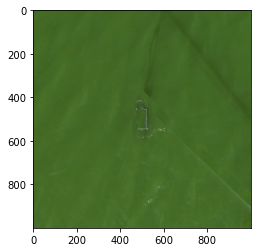

In [199]:
i = CleanImage(p)

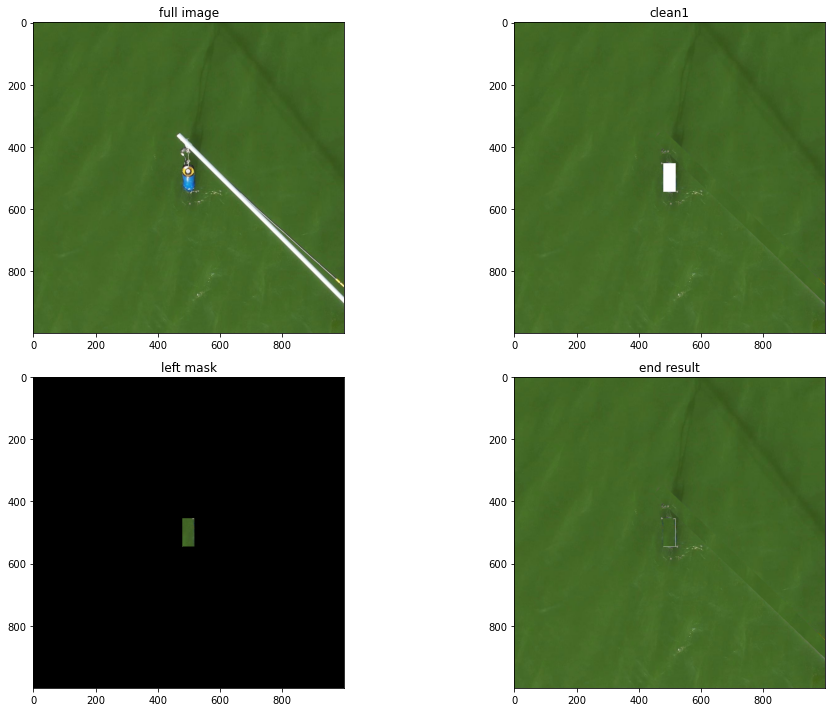

In [200]:
i.plot_steps()

Biggest rec:
center:(499, 271),width:863,height:341,angle:53
down_scale:201,x_move:266,angle:53
left 266
entered


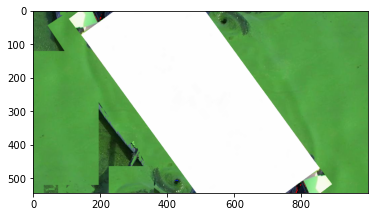

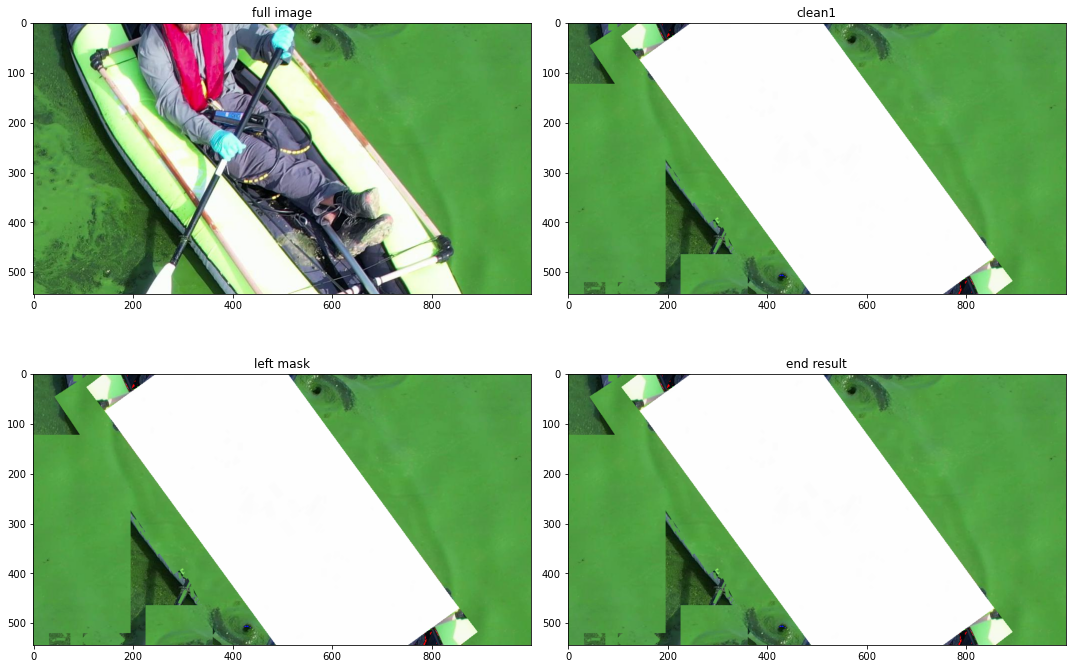

In [201]:
i = CleanImage(p1)
i.plot_steps()

Biggest rec:
center:(469, 499),width:938,height:999,angle:90
entered width<height [  0 938 938   0]
side_scale:938,y_move:0


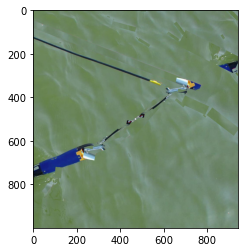

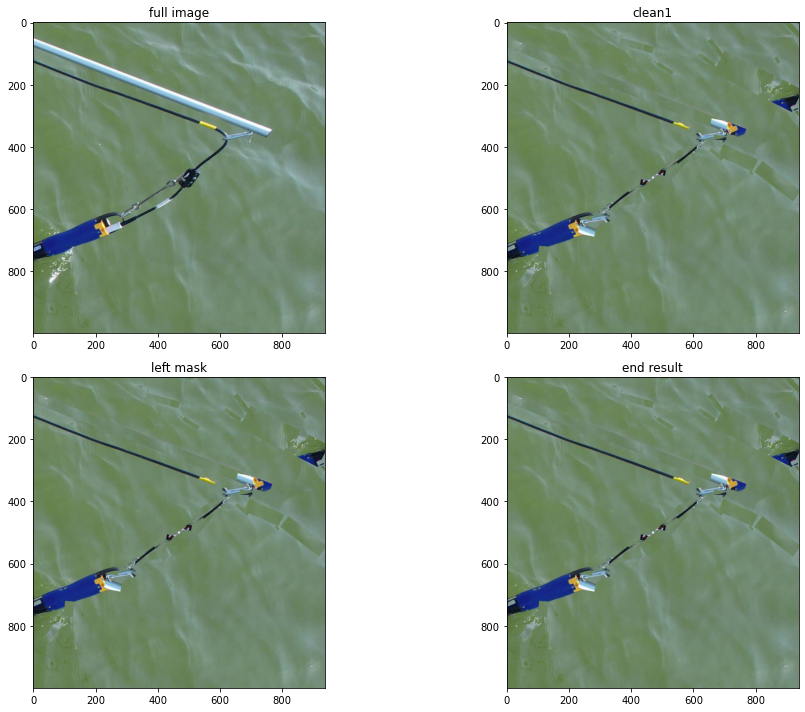

In [202]:
i = CleanImage(p2)
i.plot_steps()

Biggest rec:
center:(499, 499),width:85,height:56,angle:46
down_scale:39,x_move:40,angle:46
left 40
entered


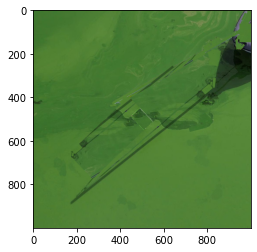

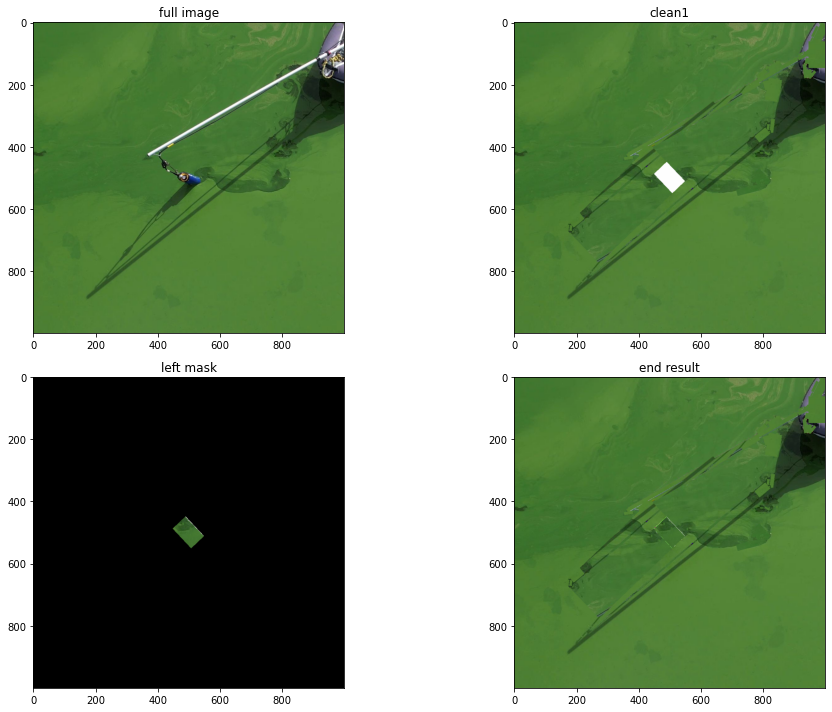

In [203]:
i = CleanImage(p3)
i.plot_steps()

Biggest rec:
center:(499, 499),width:113,height:190,angle:5
entered width<height [433 453 565 545]
side_scale:112,y_move:9


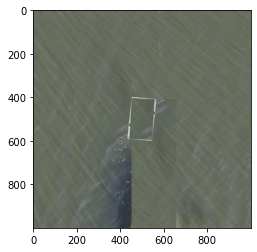

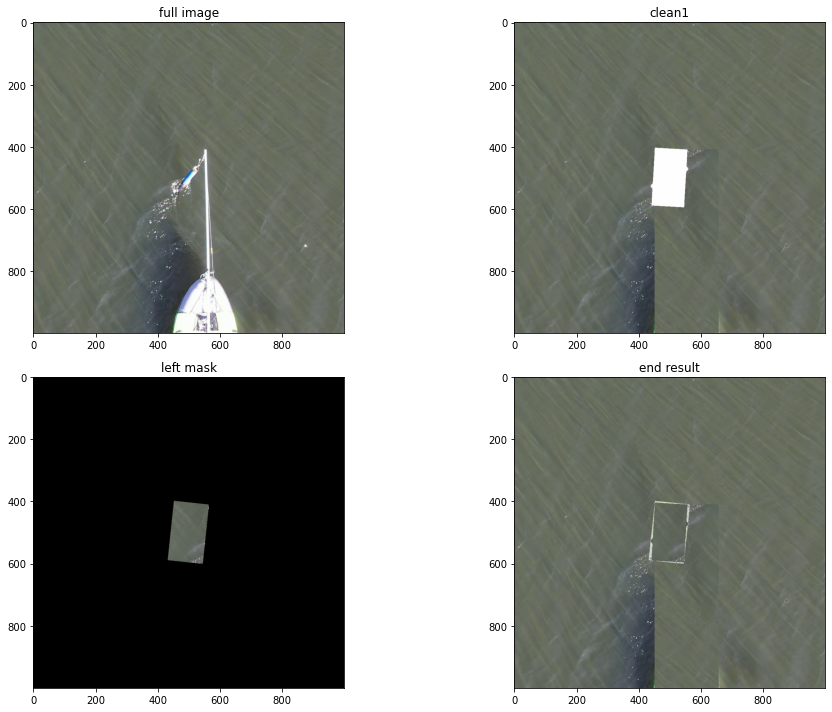

In [204]:
i = CleanImage(p4)
i.plot_steps()

Biggest rec:
center:(499, 499),width:616,height:140,angle:26
down_scale:126,x_move:61,angle:26
left 61
entered


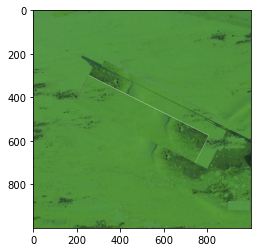

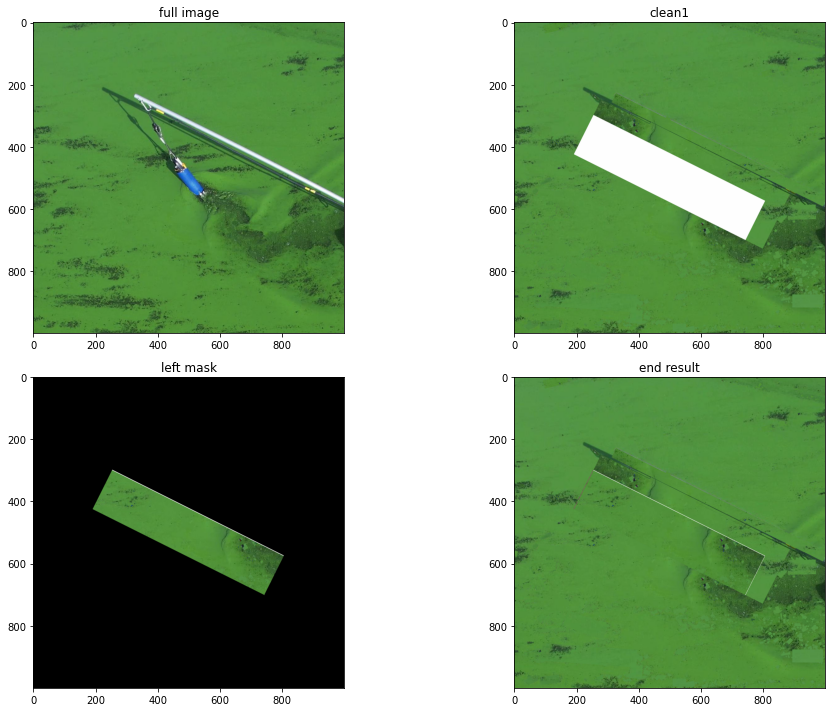

In [205]:
i = CleanImage(p5)
i.plot_steps()

Biggest rec:
center:(499, 499),width:26,height:19,angle:66
down_scale:7,x_move:15,angle:66
left 15
entered


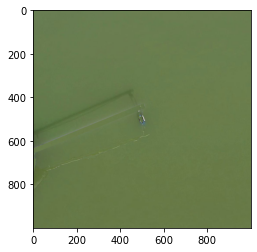

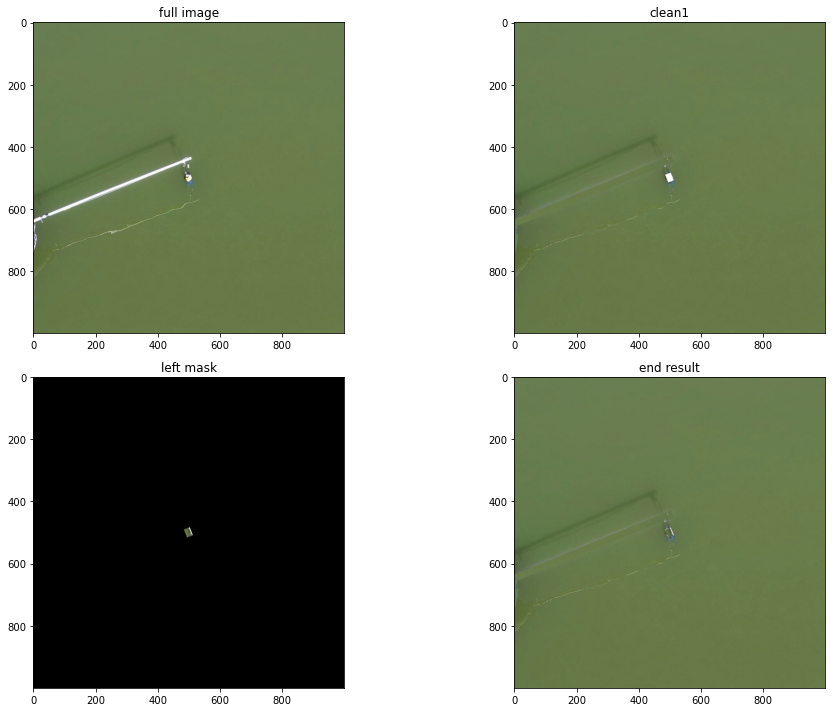

In [206]:
i = CleanImage(pp)
i.plot_steps()